# **Boston Housing Dataset**



---


The **Boston Housing Dataset** is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA , this dataset contains many columns whose analysis may lead to access to some observations or to solve certain problems, and those columns represent some of the basic factors, the change of which may lead to the change of other factors based on the strength of their relationship.





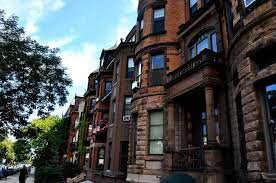

---



###**Prototasks :**
The name for this dataset is simply **boston**.
 It has two prototasks:

*    nox, in which the nitrous oxide level is to be predicted

*     price, in which the median value of a home is to be predicted

##### **our task is to predict the Median value of owner-occupied homes in $1000's (Price).**



## **Dataset**

### **Import Basic Libraries:**


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')
%matplotlib inline

### **Import Dataset from sklearn :**


---



In [ ]:
#@title
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target



###**Show the first five rows:**


---




In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###**Show the last five rows:**


---



In [ ]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9



### **Variables in order:**


---


 **CRIM :**     per capita crime rate by town

 **ZN :**       proportion of residential land zoned for lots over 25,000 sq.ft.

 **INDUS :**    proportion of non-retail business acres per town

 **CHAS :**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 **NOX :**      nitric oxides concentration (parts per 10 million)

 **RM :**       average number of rooms per dwelling

 **AGE :**      proportion of owner-occupied units built prior to 1940

 **DIS :**      weighted distances to five Boston employment centres

 **RAD :**      index of accessibility to radial highways

 **TAX :**      full-value property-tax rate per 10,000

 **PTRATIO :**  pupil-teacher ratio by town

 **B :**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 **LSTAT :**     lower status of the population

 **PRICE :**     Median value of owner-occupied homes in $1000's


---



Since the dataset is available on **sklearn.datasets** , we can display information and description about it through key **DESCR** .


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu



---
when looking for the **PRICE** column we found the data is continuous and the  output variable is a real-value, such as an integer or floating point value ,from here we know that the data is **Regression problem** requires the prediction of a quantity and becouse it has multiple input variables is often called a **multivariate regression problem**.

---

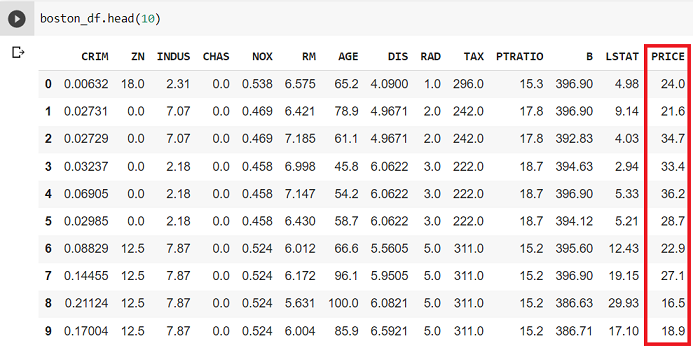

The **shapes** of the dataset (We found when printing the shapes of the dataset it contains **506 rows** and **14 columns**).



In [ ]:
boston_df.shape

(506, 14)

###**Statistical Description of Dataset**


---



In [ ]:
boston_df.describe().T #Statistical Description of Dataset

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


###**Specifies number of samples and features**


---





In [ ]:
m,n=boston_df.shape
print(f'Dataset hase {m} samples , each with {n-1} features')

Dataset hase 506 samples , each with 13 features


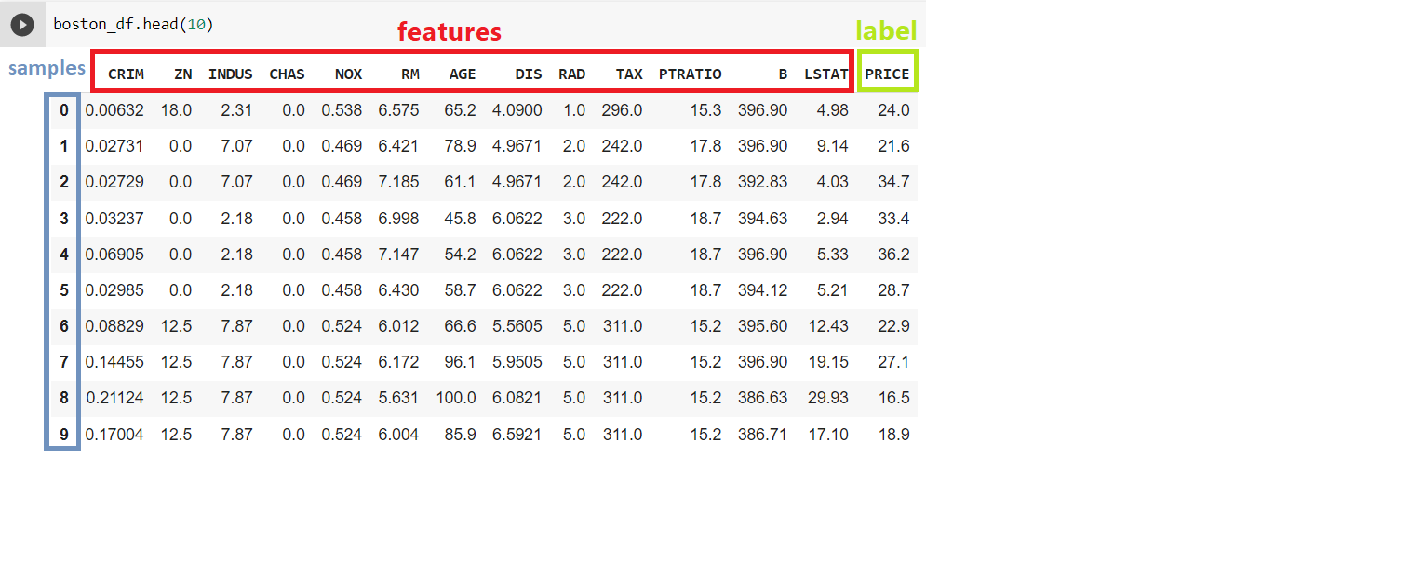

## **Exploratory Data Analysis**


---



#### **Plot relationship between features and label**


---





From the below scatter plots we can observe a lot of positive and negative relationships, such as RM column (which represent average number of rooms) seems to have a positive relation with the price.
Unlike LSTAT (which represent lower status of the population) column seems to have negative impact on the price.


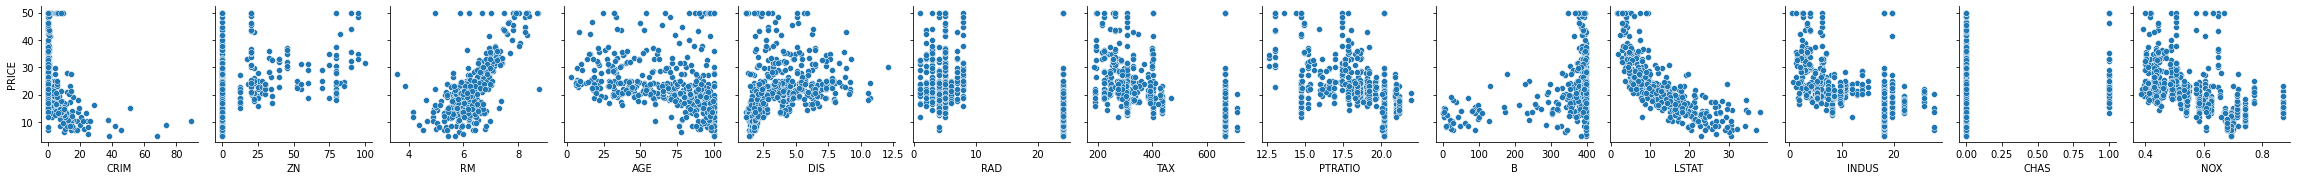

In [ ]:
sns.pairplot(data=boston_df, x_vars=boston_df[['CRIM',	'ZN',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B'	,'LSTAT', 'INDUS',	'CHAS',	'NOX']], y_vars=['PRICE'])

- We can also notice that prices of homes seem to be capped at 50, we will look closer at this weird observation later in "Probability density function" section.

#### **Checking missing values**


---



Null values are not accepted when it comes to build and train a model, so we checked the existence of them and there are **no missing values**!

In [ ]:
boston_df.isnull().sum() # show null values for each attribute

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64




#### **Checking duplicated values**


---



It's important to check if there are any duplicate values or not in order to get accurate outcomes from the model, Fortunately, there are no duplicates in our dataset.

In [ ]:
# checking duplicate values
boston_df.duplicated().sum()

0

#### **Checking and treating outliers in the data**


---

We can determine outliers using boxplot as follows:

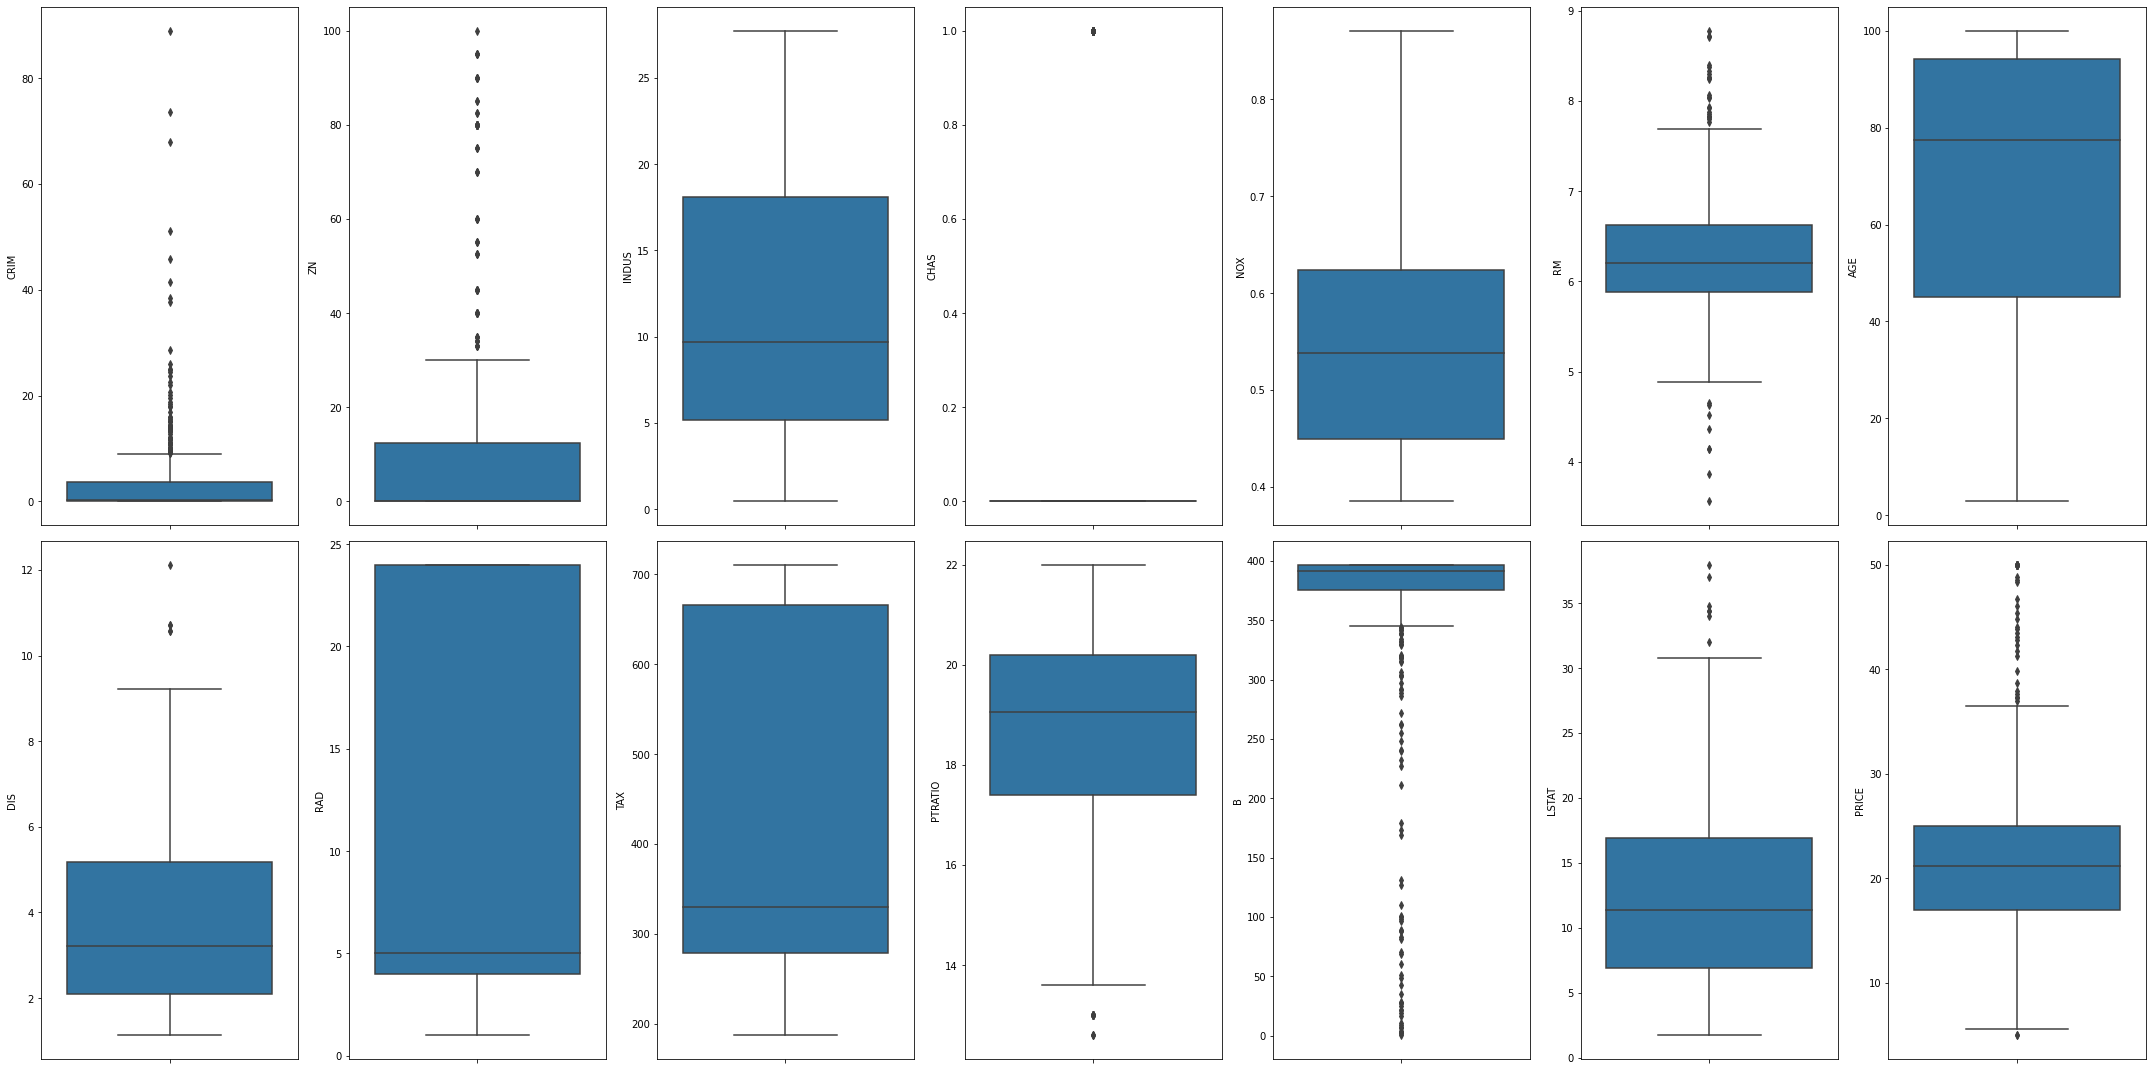

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=7,figsize=(30,15))
i = 0
ax = ax.flatten()
for col, value in boston_df.items(): #14 iterations
  sns.boxplot(data=boston_df, y = col, ax= ax[i])
  i+=1
plt.tight_layout()

Variable 'CRIM', 'ZN' and 'B' have high percentage of outlier data which can adversely affect the accuracy of our model.

To get rid of this we can either drop the observations or replace with some apporach like mean or median. But dropping all the outlier observations is not a good idea as we will be left with very fewer observations due to higher percentage of outliers to train our model on, also if we replace such a big percentage of the outliers with some approach (mean, median...etc.) then it might result into less accurate or biased model.

In [ ]:
for key , value in boston_df.items():
    qua1 = value.quantile(0.25)
    qua3 = value.quantile(0.75)
    iqr = qua3 - qua1
    value_col = value[(value <= qua1 - 1.5 * iqr) | (value >= qua3 + 1.5 * iqr)]
    percentage = np.shape(value_col)[0] * 100.0 / np.shape(boston_df)[0]
    print("Column %s outliers = %.2f%%" % (key, percentage))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


#### **Probability density function (PDF)**


---



When dealing with a set of data, often the first thing to do is get a sense for how the variables are distributed. The most convenient way to take a quick look at a distribution is a histogram (seaborn's distplot also visualizes kernel density estimation for our convenience). Solid vertical line represents mean, dashed - median.

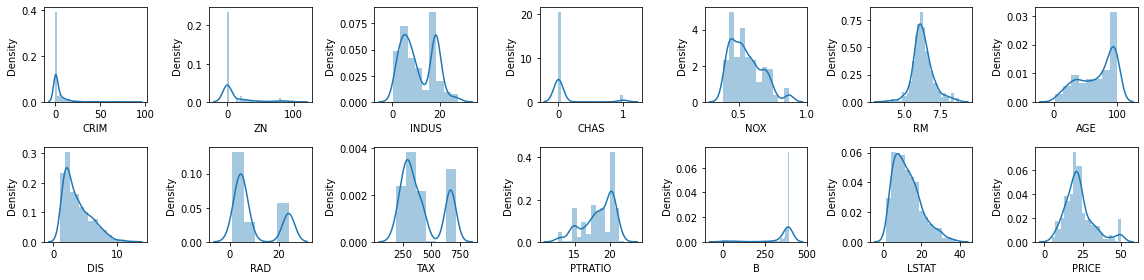

In [ ]:
def PDF(data):

  boston_df_rows_ana = 2
  boston_df_cols_ana = 7
  fig, ax = plt.subplots(nrows = boston_df_rows_ana, ncols=boston_df_cols_ana, figsize = (16,4) )
  col=data.columns
  index = 0

  for i in range(boston_df_rows_ana):
      for j in range(boston_df_cols_ana):
          sns.distplot(data[col[index]],ax = ax[i][j])
          index = index +1

  plt.tight_layout()
PDF(boston_df)

**First observation:** We noticed in the PRICE distribution an unusual increase when it reaches 50,000$, so we plotted a scatter plot to have a better look.

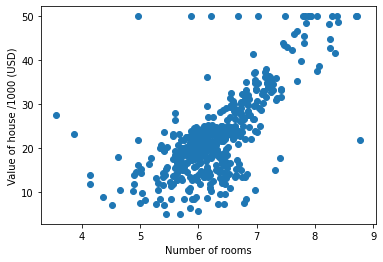

In [ ]:
X_rooms = boston_df['RM']
plt.scatter(X_rooms, boston_df['PRICE'])
plt.ylabel('Value of house /1000 (USD)')
plt.xlabel('Number of rooms')
plt.show()

From scatter plot of the data, you quickly notice that prices of homes seem to be capped at 50. This is because the Census Service censored the data.

Censoring data means restricting the range of possible values of a variable. In this case, they decided to set the maximum value of the price variable to 50k USD, so no price can go beyond that value.([Source](https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8))

That’s why, when you visualize the data, you see a sort of ceiling that flattens your datapoints at 50. In reality, these prices were probably higher.

So in order to avoid any uncertainty in model results, we removed these points considering them as outliers.

---



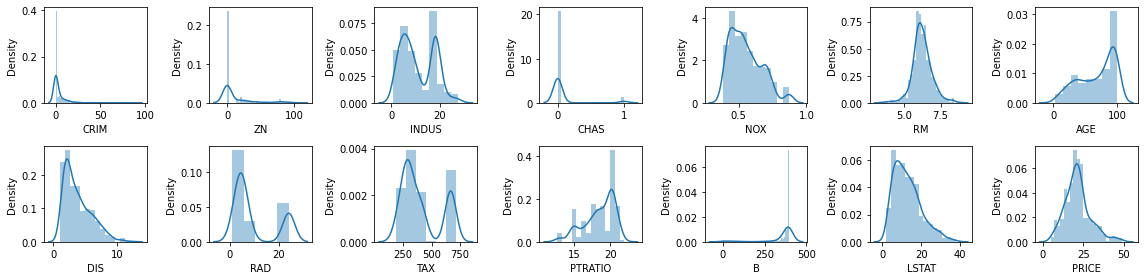

In [ ]:
boston_df_outliers = boston_df[boston_df['PRICE']==50]
boston_df = boston_df.drop(boston_df_outliers.index, axis=0)
PDF(boston_df)

**Second observation:**
- ZN looks like it has many 0s.

**Third observation:**
- `CHAS and RAD` seems to be catigorical, thus they aren't normally distrbuted.
- `CRIM, ZN, INDUS, DIS, PTRATIO, NOX, LSTAT, AGE, TAX and B` are not normally distributed.
- `RM` is noramally distributed.

We recommend using logarithmic transformation to transform data to normal distribution to have better understanding of relationship between independet and dependet feature. ([logarithmic transformation](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9))

---

In [ ]:
'''features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for feature in features:
    boston_df[feature]=np.log(boston_df[feature])

PDF(boston_df)'''

"features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']\nfor feature in features:\n    boston_df[feature]=np.log(boston_df[feature])\n\nPDF(boston_df)"

#### **Correlation between columns**


---



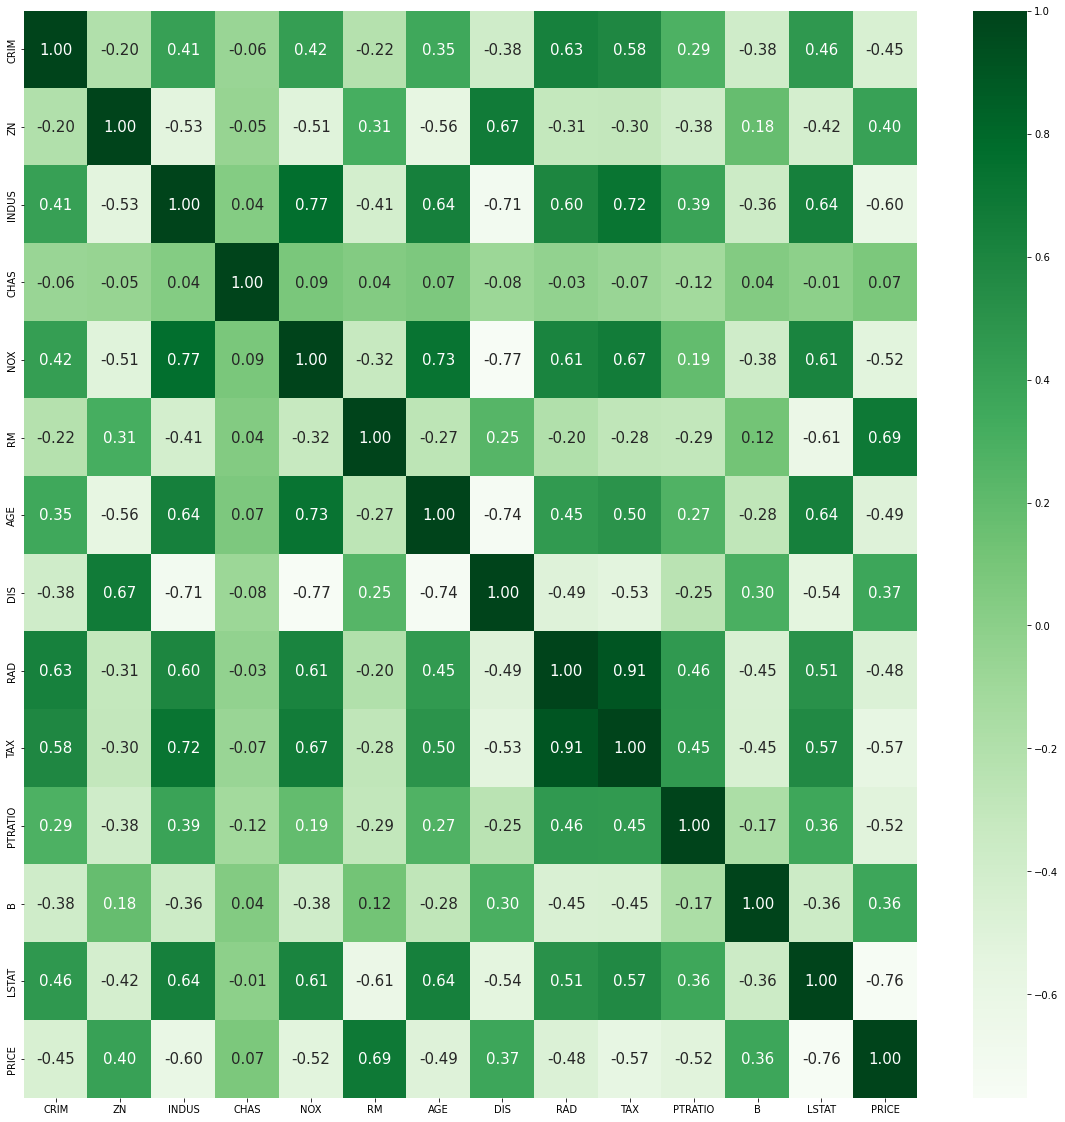

In [ ]:
corr = boston_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

- So from above correlation matrix we identify that PRICE feature more correlatd with INDUS, NOX, TAX, PTRATIO, LSTAT, RM features


### **Data Featuring**
Now we choose different features and check which one is better for price prediction


---



Define function that return Correlated Features based on given threshold

In [ ]:
def getCorrelatedFeatures(corrdata, threshold):
    boston_df_features = []
    boston_df_value = []
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            boston_df_features.append(index)
            boston_df_value.append(corrdata[index])

    df = pd.DataFrame(data = boston_df_value, index = boston_df_features,columns = ['CorrValue'] )
    return df

Get Correlated Features (more than **0.5** correlation with the target)

In [ ]:
threshold = 0.5
boston_df_corr = boston_df.corr()
corr_value = getCorrelatedFeatures(boston_df_corr['PRICE'],threshold)
print(corr_value)

         CorrValue
INDUS    -0.600005
NOX      -0.524451
RM        0.686634
TAX      -0.572442
PTRATIO  -0.518641
LSTAT    -0.759837
PRICE     1.000000


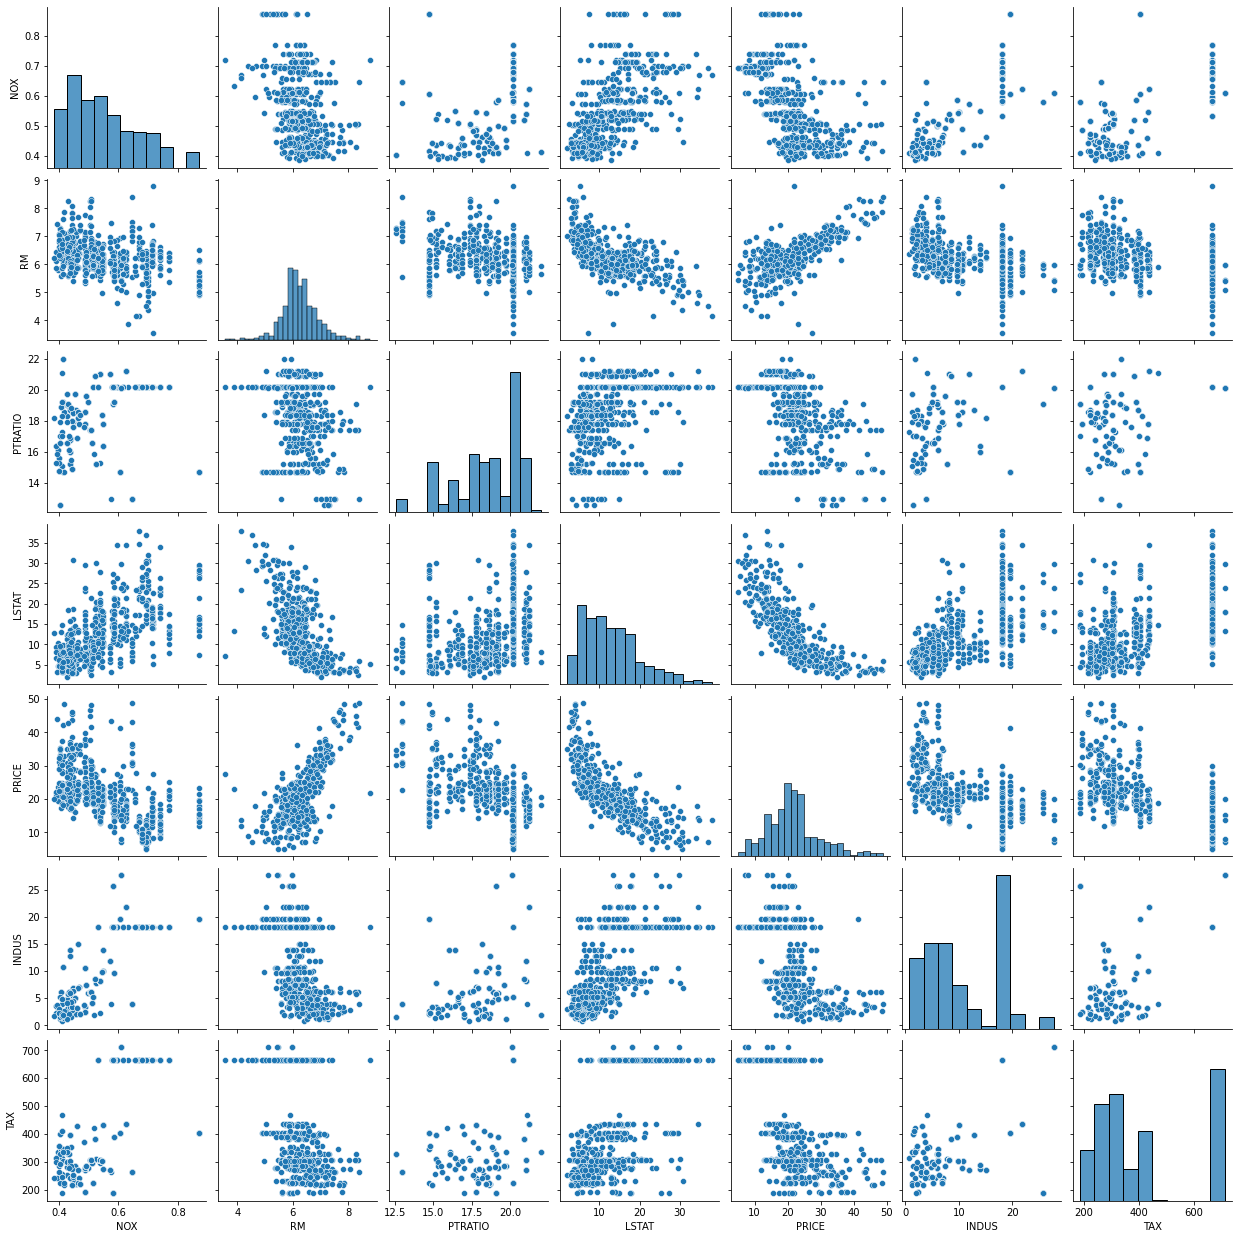

In [ ]:
boston_df_multi = boston_df[['NOX', 'RM' ,'PTRATIO','LSTAT','PRICE', 'INDUS', 'TAX']]
sns.pairplot(boston_df_multi)

### **Encode the outcome to a one-hot vector**



---


To know the data type of columns we use **dtypes** and then find that the dataset has **numerical** (float64) data .


---



In [ ]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [ ]:
boston_df.nunique() #Get unique values in each attribute

CRIM       489
ZN          26
INDUS       74
CHAS         2
NOX         80
RM         431
AGE        350
DIS        398
RAD          9
TAX         64
PTRATIO     44
B          342
LSTAT      442
PRICE      228
dtype: int64

After our understanding of the dataset and studying it extensively, and observing the contents of each variables, we found that **RAD variable**, although it is of a numeric , when observing the values ​​inside it, we notice that there is a group of sampels that share the same value from a variable, and therefore we note that that RAD variables is **categorical variable** (the values don't necessarily represent a number but perhaps a ranking).

So that we encode the RAD variable to a **one-hot vector**.


In [ ]:
boston_df.RAD.value_counts()

24.0    127
5.0     109
4.0     108
3.0      37
6.0      26
2.0      24
8.0      23
1.0      19
7.0      17
Name: RAD, dtype: int64

In [ ]:
#representing it as categorical variable
#boston_df["RAD"]=boston_df["RAD"].astype("category")
#datatype of the boston_df
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

now using **boston_df.get_dummies() :**

 it will drop the original column also this method will automatically pick the categorical variable and apply 1-hot encoding

In [ ]:
#boston_df=pd.get_dummies(boston_df,prefix="RAD")
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#boston_df['RAD'] = le.fit_transform(boston_df['RAD'])

* ### **Note**

When we explored and understood the data more, **RAD was  ordinal - categorical**, which means that the increase in value is important and refers to a specific thing ( **"larger index denotes better accessibility"**).          
Therefore, because we do not want the data to lose its value, we excluded one hot encode, because the presence of ranking is important in this case, and if we do one hot encode, the data will lose its value, and all values ​​are treated the same and holding the same meaning.

###**Dividing Data into Features and Labels**

In [ ]:
Features = boston_df.drop(['PRICE'], axis=1)
target = boston_df['PRICE']

### **Splitting Data for PCA**

Splitting the data into training, validation, and test sets

- splitting the data into two sets: a training set and a test set. The suggested split is 70% for the training set and 30% for the test set.

- splitting the training set further into a training set and a validation set. The suggested split is 90% for the training set and 10% for the validation set.

This way, we will have three sets of data: a training set to train our model (70% of the original dataset), a validation set to tune the hyperparameters of our model (10% of the original dataset), and a test set to evaluate the final performance of our model (20% of the original dataset).

In [ ]:

# Extract the input attributes and target variable
#X_pca = X_principal_a.iloc[:, :-1]
#y_pca = X_principal_a.iloc[:, -1]
# Split the data into training, validation, and test sets

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Features, target, test_size=0.2, random_state=42)
X_train_pca, X_val_pca, y_train_pca,y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.125, random_state=42)

# The training set now has 70% of the data
# The validation set has 10% of the data
# The test set has 20% of the data


In [ ]:
# Print the shapes of the training, validation, and test sets :
print(f'X_train shape: {X_train_pca.shape}')
print(f'X_val shape: {X_val_pca.shape}')
print(f'X_test shape: {X_test_pca.shape}')


X_train shape: (343, 13)
X_val shape: (49, 13)
X_test shape: (98, 13)


## **Principal Component Analysis**

---


Principal component analysis works by finding a smaller set of column values from an uncorrelated larger set. This method works by representing independent, uncorrelated features as a sum of the original features.

Let’s start by importing the **PCA package** from Sklearn. We will also need the **StandardScaler** method from the preprocessing module in Sklearn.

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from datetime import datetime

**Next** , let’s scale our data using the standardScaler method. This step helps with numerical stability when the algorithm computes the components

In [ ]:

# Standardize data
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.columns = Features.columns

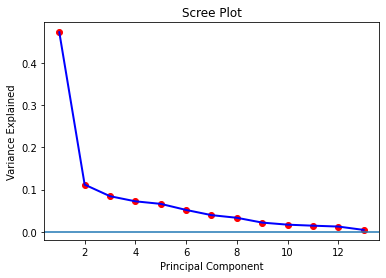

In [ ]:
#detrimnne number of components

import numpy as np
pca = PCA(n_components = None)
X_principal = pca.fit_transform(X_train_pca)
X_principal = pd.DataFrame(X_principal)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, '-', linewidth=2, color='blue')
plt.scatter(PC_values, pca.explained_variance_ratio_,color='red')
plt.axhline()
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The x-axis displays the **principal component** and the y-axis displays the **percentage of total variance explained** by each individual principal component.




In [ ]:
# percentage of total variance explained by each principal component
print([round(num, 2) for num in (pca.explained_variance_ratio_*100).tolist()])

[47.2, 11.16, 8.42, 7.21, 6.6, 5.17, 3.94, 3.31, 2.18, 1.69, 1.45, 1.24, 0.44]


**We can see:**



*   The first principal component explains 47.13% of the total variation in the dataset.
*   The second principal component explains 11.16% of the total variation.
*The third principal component explains 8.54% of the total variation.
*The fourth principal component explains 7.22% of the total variation
*The fiveth principal component explains 6.55% of the total variation

 and etc......

**Note that the percentages sum to 100%.**







In [ ]:
print(str(round(sum(pca.explained_variance_ratio_)*100,2))+"%")

100.0%


**The first principal component** of a set of variables is the standardized linear combination of the original variables with the largest variance among all linear combinations (47.13%). **The second principal component** is the standardized linear combination of original variables with the largest variance
 (11.16%) among all remaining linear combinations, given that the second principal component is not correlated with the first principal component.

**Next,** let us try the threshold of variance explained approach. In this case, we hold on to principal components that explain **at least 70%** of the variance cumulatively.  (**With more than fiveth principal component**), the cumulative proportion of the variance explained surpasses 70%, therefore we would consider to keep **fiveth** principal components.  If a higher threshold were used, then additional principal components would have to be retained.



In [ ]:
for i in range (1,11):
  print(f"in the {i}th "+"the cumulative proportion of the variance explained surpasses : "+str(round(sum(pca.explained_variance_ratio_[:i])*100,2))+"%")

in the 1th the cumulative proportion of the variance explained surpasses : 47.2%
in the 2th the cumulative proportion of the variance explained surpasses : 58.35%
in the 3th the cumulative proportion of the variance explained surpasses : 66.77%
in the 4th the cumulative proportion of the variance explained surpasses : 73.98%
in the 5th the cumulative proportion of the variance explained surpasses : 80.58%
in the 6th the cumulative proportion of the variance explained surpasses : 85.75%
in the 7th the cumulative proportion of the variance explained surpasses : 89.69%
in the 8th the cumulative proportion of the variance explained surpasses : 93.01%
in the 9th the cumulative proportion of the variance explained surpasses : 95.18%
in the 10th the cumulative proportion of the variance explained surpasses : 96.87%


In [ ]:
pca_a = PCA(n_components = 5)
X_train_pca = pca_a.fit_transform(X_train_pca)
X_test_pca = pca_a.transform(X_test_pca)
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.columns = ['P1', 'P2','P3','P4','P5']
X_train_pca

,P1,P2,P3,P4,P5
0,-1.648974,0.021591,-1.273739,0.089720,-0.830904
1,4.203886,0.826954,-0.184688,0.345148,0.180703
2,-0.089852,-1.204285,-0.430616,-0.566945,-0.126991
3,-2.459325,0.605754,0.953015,-0.350154,0.671776
4,2.974754,0.849244,1.650239,-0.279261,-1.425614
...,...,...,...,...,...
338,2.812027,-2.297557,-0.791137,-0.808231,3.175165
339,2.683602,-1.042976,1.553335,3.676643,-0.663386
340,0.908952,-0.869522,1.168289,-1.142270,1.319399
341,-1.297118,-0.862607,0.868694,-0.870730,-0.410287


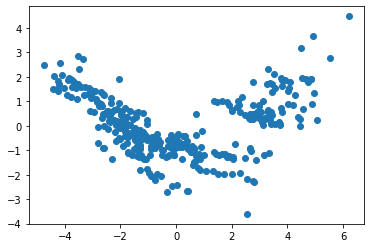

In [ ]:
plt.scatter(X_train_pca['P1'],X_train_pca['P2'])

### **Splitting data before PCA**


---



In [ ]:
# Extract the input attributes and target variable
X = boston_df.iloc[:, :-1]
y = boston_df.iloc[:, -1]

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train,y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# The training set now has 70% of the data
# The validation set has 10% of the data
# The test set has 20% of the data
''

''



---

---




####After data processing and perform The requirements , The dataset is **ready** for  Build and develop the models (tasks)..


---

---






* **Task#1**: Clustering in an unsupervised fashion (K-means clustering)
* **Task#2**: Logistic/Linear Regression
* **Task#3**: Neural Network for Classification/Regression

# **Task1: Clustering in an unsupervised fashion (K-means clustering)**
######[**clustering**](https://en.wikipedia.org/wiki/Cluster_analysis) : is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).                           
or                                                                               
######[**clustering**](https://heartbeat.comet.ml/how-to-evaluate-clustering-based-models-in-python-503343816db2/) : is an unsupervised machine learning technique used to identify and group similar data points within a larger, unlabelled dataset. It refers to the process of finding a structure or pattern inside an otherwise unstructured dataset

######one of the main types of clustering is **Centroid-based Clustering (e.g., K-Means Clustering)** which I use it in my task .

######[**K-Means Clustering**](https://https://heartbeat.comet.ml/how-to-evaluate-clustering-based-models-in-python-503343816db2) :  is an **unsupervised machine learning algorithm** that groups unlabeled data into k number clusters, where k is a user-defined integer. K-means is an iterative algorithm that makes use of cluster centroids to divide the data in a way that groups similar data into groups.

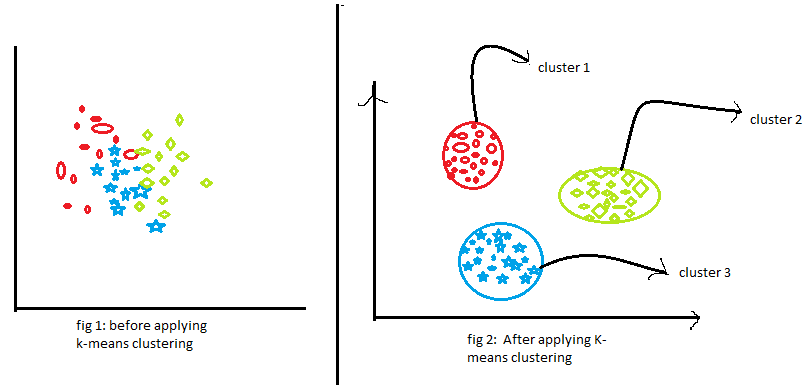

After we can noticed the plotting the error rate appears significantly, as the groups are greatly overlapping, and this is evidence that the data is **not ready enough to be entered into the model** .
and lack the  processing  like ( normalization /standarization or dimensionality reduction ), in many cases may require removing the outliers.  
**Therefore**, my notes cannot be accessed through a Moodle built in this way, and needs processing and understanding The data for every fields.



## **After processing (PCA & Scaling)**

In [ ]:
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [ ]:
#copy the variable from X_train_pca and X_test_pca
X_train_pca1=X_train_pca.copy()
X_test_pca1=X_test_pca.copy()

**Now** , after data being ready for perform the model then to determine the correct number of clusters we will make use of the **elbow method**.  

**X_train_pca1** will contain information about more important featuers in boston dataset and I use **X_train_pca1**, and try to divide the dataset into different clusters using K-means instead. Below, I use the elbow method to find the value of **k** .

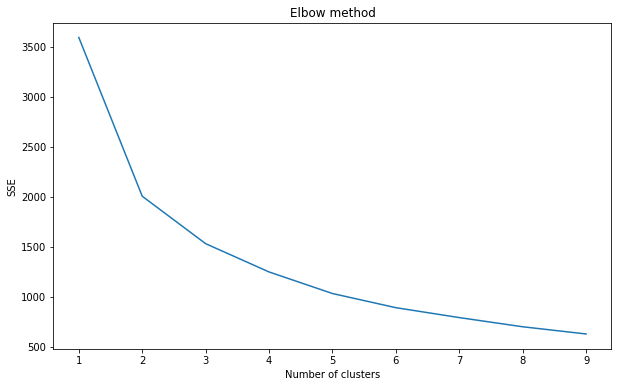

 				 elbow method Done...! 				


In [ ]:
# sse: sum of distance all point of culter and their centroid
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_pca1)
    sse[k] = kmeans.inertia_  # Inertia: Sum of distances of samples to their closest cluster center

#plotting the elbow method
plt.figure(figsize=(10,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()
print("","="*100," \n \t\t\t\t elbow method Done...! \t\t\t\t\n","="*100)

The elbow method has given us an optimal value of k that is **almost four clusters**.
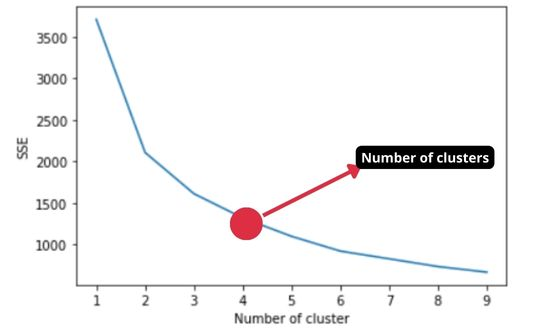

Also we can use the [**silhouette plot :** ](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)     which displays a measure of how **close each point in one cluster is to points in the neighboring clusters** and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

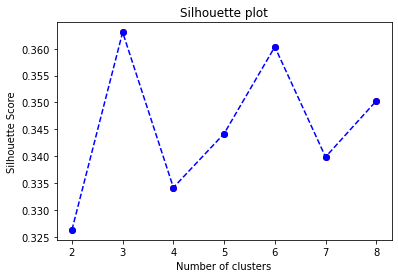

 				 Silhouette plot Done...! 				


In [ ]:
silhouette_scores = []

for n_cluster in range(3, 10):
    silhouette_scores.append(silhouette_score(X_train_pca1, KMeans(n_clusters = n_cluster).fit_predict(X_train_pca1)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7,8]
#plt.figure(figsize=(10,6))
plt.title("Silhouette plot")
plt.plot(k, silhouette_scores, '--ob')
plt.scatter(k, silhouette_scores,color='r')
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()
print("","="*100," \n \t\t\t\t Silhouette plot Done...! \t\t\t\t\n","="*100)

The  **silhouette_scores** represents how well the data point has been clustered, and scores **above 0 are seen as good** and there maybe when looking at the third or fiveth cluster may found the silhouette_scores the greatest score , and here I choose the optimal value of k that is almost **four clusters** anf then evalute the model with this number of k.

###**Let’s use this value to build a model.**

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=100,  n_init=500).fit(X_train_pca1)
# n_clusters : The number of clusters to form as well as the number of centroids to generate.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run.
# n_init : Number of times the k-means algorithm is run with different centroid seeds.
print("","="*100," \n \t\t\t\t K-means Algorithm Done...! \t\t\t\t\n","="*100)

 				 K-means Algorithm Done...! 				


In [ ]:
# Adding the 'kmeans.labels_' to 'X_train_pca1 data frame' as a column
if "Clusters" not in X_train_pca1:
  X_train_pca1["Clusters"] = kmeans.labels_
X_train_pca1

,P1,P2,P3,P4,P5,Clusters
0,-1.648974,0.021591,-1.273739,0.089720,-0.830904,1
1,4.203886,0.826954,-0.184688,0.345148,0.180703,0
2,-0.089852,-1.204285,-0.430616,-0.566945,-0.126991,1
3,-2.459325,0.605754,0.953015,-0.350154,0.671776,2
4,2.974754,0.849244,1.650239,-0.279261,-1.425614,0
...,...,...,...,...,...,...
338,2.812027,-2.297557,-0.791137,-0.808231,3.175165,0
339,2.683602,-1.042976,1.553335,3.676643,-0.663386,3
340,0.908952,-0.869522,1.168289,-1.142270,1.319399,1
341,-1.297118,-0.862607,0.868694,-0.870730,-0.410287,1


Plotting the data in the **tow dimension [2D]** to add more visualization to it

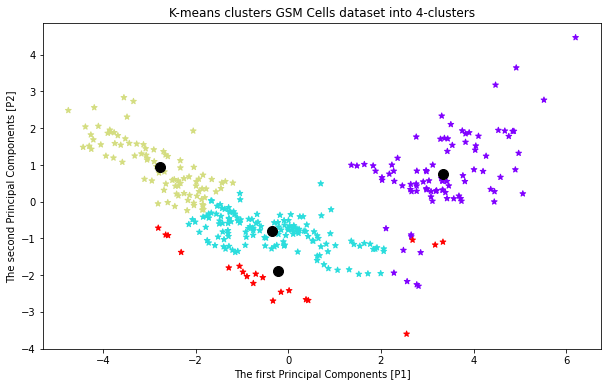

In [ ]:
#plot the data points for the first two components
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca1['P1'], X_train_pca1['P2'], c= X_train_pca1["Clusters"],cmap='rainbow' , marker='*')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100,c='black')

# naming the x axis
plt.xlabel('The first Principal Components [P1]')

# naming the y axis
plt.ylabel('The second Principal Components [P2]')

#Adding the title
plt.title("K-means clusters GSM Cells dataset into 4-clusters");

Plotting the data in the **three dimension [3D]** to add more visualization to it

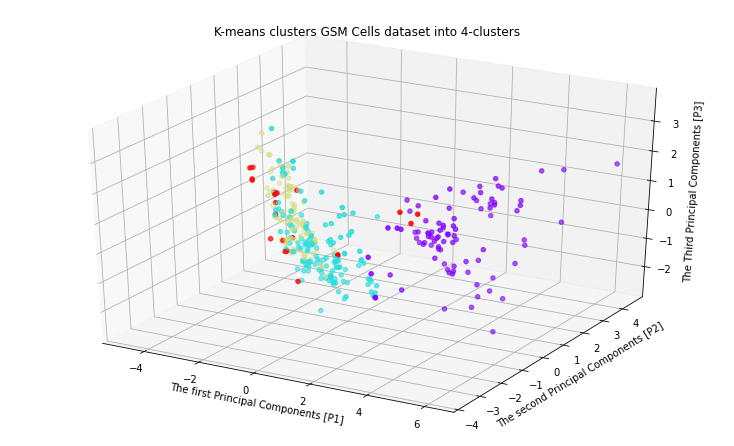

In [ ]:
# keep 3 dimentions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)
ax.scatter(X_train_pca1["P1"],X_train_pca1["P2"], X_train_pca1["P3"],c= X_train_pca1["Clusters"], marker='o',cmap='rainbow')

# naming the x axis
plt.xlabel('The first Principal Components [P1]')

# naming the y axis
plt.ylabel('The second Principal Components [P2]')

# naming the Z axis
ax.set_zlabel("The Third Principal Components [P3]")

#Adding the title
plt.title("K-means clusters GSM Cells dataset into 4-clusters")
plt.show();




####**print the correlation between pca features and target**


---



In [ ]:
X_train_pca11=X_train_pca1
X_train_pca11['target']= pd.DataFrame(y_train_pca).values

In [ ]:
X_train_pca11

,P1,P2,P3,P4,P5,Clusters,target
0,-1.648974,0.021591,-1.273739,0.089720,-0.830904,1,21.1
1,4.203886,0.826954,-0.184688,0.345148,0.180703,0,5.6
2,-0.089852,-1.204285,-0.430616,-0.566945,-0.126991,1,19.4
3,-2.459325,0.605754,0.953015,-0.350154,0.671776,2,32.0
4,2.974754,0.849244,1.650239,-0.279261,-1.425614,0,15.0
...,...,...,...,...,...,...,...
338,2.812027,-2.297557,-0.791137,-0.808231,3.175165,0,11.8
339,2.683602,-1.042976,1.553335,3.676643,-0.663386,3,22.7
340,0.908952,-0.869522,1.168289,-1.142270,1.319399,1,25.0
341,-1.297118,-0.862607,0.868694,-0.870730,-0.410287,1,29.9


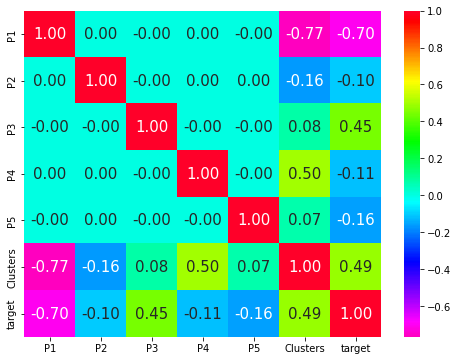

In [ ]:
import seaborn as sns
corr = X_train_pca11.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='gist_rainbow_r');


When looking at the correlation between PCA features and Clusters with Target (Price), we find that the correlation is **almost non-existent , very weak**, and since the dataset that I worked on **cannot be resolved by unsupervised learning** (K-means clustering)

And we should use **supervised learning** to make a regression and prediction.


---



---



It might be a good information that you can use with   [**KMeans :**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.htmlMethod )
many methods like **fit** and **predict** , The deffrince :
* **fit** : Compute k-means clustering.
* **predict** : Predict the closest cluster each sample in X belongs to   

**And now I use the predict with X_test Pca1 to predict each data sample in it for which clusters belongs to**

In [ ]:
#convert the X_test_pca1 to dataframe with clusters columns
label_test=kmeans.fit_predict(X_test_pca1)
X_test_pca1=pd.DataFrame(X_test_pca1)
X_test_pca1.columns=X_train_pca1.columns[:-2]
X_test_pca1['Clusters']=label_test
X_test_pca1
print("","="*100," \n \t\t\t\t Predict for testing Done...! \t\t\t\t\n","="*100)

 				 Predict for testing Done...! 				


**Now** , that I have my labels and predictions let’s evaluate this model to find out well it performed!

**Then**, I would plot the testing data with training to make it more clear and show which cluster the model predicts for each data sample in testing data according to training data clustering .

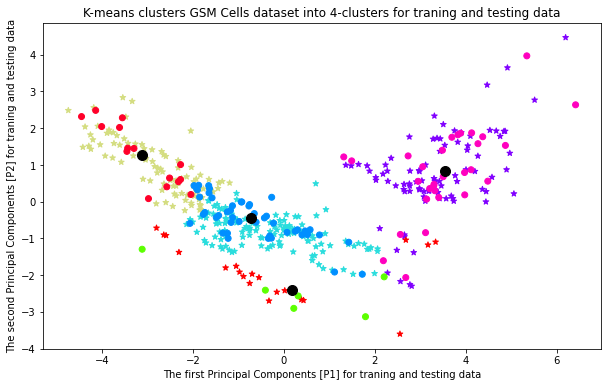

In [ ]:
plt.figure(figsize=(10, 6));
#plot the data points for the first two components
plt.scatter(X_train_pca1['P1'], X_train_pca1['P2'], c= X_train_pca1["Clusters"],cmap='rainbow' , marker='*') #traning data
plt.scatter(X_test_pca1["P1"],X_test_pca1["P2"],c=X_test_pca1["Clusters"],marker='o',cmap='gist_rainbow_r') #testing data

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100,c='black')

# naming the x axis
plt.xlabel('The first Principal Components [P1] for traning and testing data')

# naming the y axis
plt.ylabel('The second Principal Components [P2] for traning and testing data')

#Adding the title
plt.title("K-means clusters GSM Cells dataset into 4-clusters for traning and testing data");

**Now** , I think it is always a better idea to **evaluate my machine learning models** before making decisions based on them,
 **Metric evaluation** is an easy-to-interpret solution for checking the performance of the model.                                                        
 often by identifying clusters of data with similar (but independent) features. Now, I will discuss different clustering algorithms and how to evaluate their results. Let’s get started !                                                    
 **Evaluation Metrics For Clustering-Based Models**
 * Normalized Mutual Information
 * Davies Bouldin index
 * Silhouette Score
 * Calinski Harabaz Index
 * pinning the target and observing the results



---



 * ### **Davies Bouldin index**
 is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.


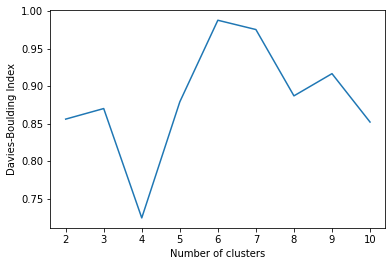

In [ ]:
from sklearn.metrics import davies_bouldin_score
results = {}
for i in range(2,11):
    kmeans1 = KMeans(n_clusters=i, random_state=30)
    labels = kmeans1.fit_predict(X_test_pca1)
    db_index = davies_bouldin_score(X_test_pca1, labels)
    results.update({i: db_index})
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()
# we can still observe that choosing 4 clusters minimizes the similarity measure.

In [ ]:
# where similarity is the ratio of within-cluster distances to between-cluster distances.
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_test_pca1,label_test)

0.7242986535338589

When looking at the plotting where a smaller value represents a better model that produces better clusters and here the **fourth cluster** represent the smaller value of Davies-Boulding Index .

* ### **Silhouette Score**
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm by taking the mean distance from intra-cluster and nearest cluster samples.                                                                
The closer the value of the silhouette score to 1 the **better-separated** the clusters.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_score(X_test_pca1,label_test)

0.4825158120898574

silhouette score is **0.486** which is acceptable and shows clusters are not overlapping.

* ### **Calinski Harabaz Index**
is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.                                                      
The higher the index the **more separable** the clusters.

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X_test_pca1,label_test)

85.54872302518054

* ### **pinning the target**
By spliting The dataset into classes with observation 5 classes :              

*   Home prices range from 0 to 9.

*   Home prices range from 9 to 19.

*   Home prices range from 19 to 29.

*   Home prices range from 29 to 39.

*   Home prices range from 39 to 50.





In [ ]:
# adding the target column to dataset traning
X_test_pca11=X_test_pca1
X_test_pca11['target']= pd.DataFrame(y_test_pca).values
Pca_classifair=X_train_pca11

update the target value to (0 or 1 or 2 or 3 or 4 or 5), which means that the houses with prices between 0 and 9 are in the same group with class labeled 0, etc.....

In [ ]:
# update the target value to (0 or 1 or 2 or 3 or 4 or 5)
Pca_classifair['target']=np.where((Pca_classifair['target']>=0 ) & (Pca_classifair['target']<=9),0,Pca_classifair['target'])
Pca_classifair['target']=np.where((Pca_classifair['target']>9 ) & (Pca_classifair['target']<=19),1,Pca_classifair['target'])
Pca_classifair['target']=np.where((Pca_classifair['target']>19 ) & (Pca_classifair['target']<=29),2,Pca_classifair['target'])
Pca_classifair['target']=np.where((Pca_classifair['target']>29 ) & (Pca_classifair['target']<=39),3,Pca_classifair['target'])
Pca_classifair['target']=np.where((Pca_classifair['target']>39 ) & (Pca_classifair['target']<=50),4,Pca_classifair['target']);

In [ ]:
#show the data frame
Pca_classifair

,P1,P2,P3,P4,P5,Clusters,target
0,-1.648974,0.021591,-1.273739,0.089720,-0.830904,1,2.0
1,4.203886,0.826954,-0.184688,0.345148,0.180703,0,0.0
2,-0.089852,-1.204285,-0.430616,-0.566945,-0.126991,1,2.0
3,-2.459325,0.605754,0.953015,-0.350154,0.671776,2,3.0
4,2.974754,0.849244,1.650239,-0.279261,-1.425614,0,1.0
...,...,...,...,...,...,...,...
338,2.812027,-2.297557,-0.791137,-0.808231,3.175165,0,1.0
339,2.683602,-1.042976,1.553335,3.676643,-0.663386,3,2.0
340,0.908952,-0.869522,1.168289,-1.142270,1.319399,1,2.0
341,-1.297118,-0.862607,0.868694,-0.870730,-0.410287,1,3.0


Now, after preparing the data frame with replace the target with classes we can consider this a **(Y)** and clusters labels are a **y predicted** , then we can:
* compute confusion matrix to evaluate the accuracy of a classification.
* Build a text report showing the main classification metrics.
* Accuracy classification score.

In [ ]:
#perform the confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion_matrix : \n\n',confusion_matrix(Pca_classifair['target'],Pca_classifair['Clusters']))
print('='*100)
#the main classification metrics
print('classification_report: \n\n',classification_report(Pca_classifair['target'],Pca_classifair['Clusters']))
print('='*100)
#Accuracy classification
print('accuracy_score \n\n :',accuracy_score(Pca_classifair['target'],Pca_classifair['Clusters']));

confusion_matrix : 

 [[15  0  0  0  0]
 [51 38  9  3  0]
 [24 80 52 13  0]
 [ 1 18 26  4  0]
 [ 0  6  3  0  0]]
classification_report: 

               precision    recall  f1-score   support

         0.0       0.16      1.00      0.28        15
         1.0       0.27      0.38      0.31       101
         2.0       0.58      0.31      0.40       169
         3.0       0.20      0.08      0.12        49
         4.0       0.00      0.00      0.00         9

    accuracy                           0.32       343
   macro avg       0.24      0.35      0.22       343
weighted avg       0.40      0.32      0.32       343

accuracy_score 

 : 0.3177842565597668


* ### **Normalized Mutual Information**
[Normalized Mutual Information (NMI) : ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation) , and can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(Pca_classifair['target'],Pca_classifair['Clusters'])

0.15086744670624896

## **Before processing (PCA & Scaling)**

In [ ]:
X_train1=X_train
X_test1=X_test

* ### **Determine the correct number of clusters :**

1.  **elbow method.**



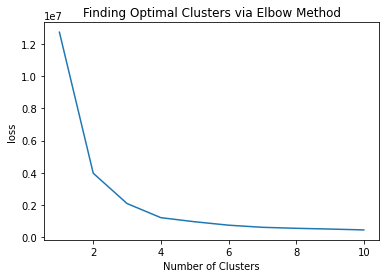

In [ ]:
loss =[]
for i in range(1, 11):
  km = KMeans(n_clusters = i).fit(X_train1)
  loss.append(km.inertia_)
#printing loss against number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), loss)
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.show()

The elbow method has given us an optimal value of k that is almost Three clusters.
2.  **Silhouette Method**



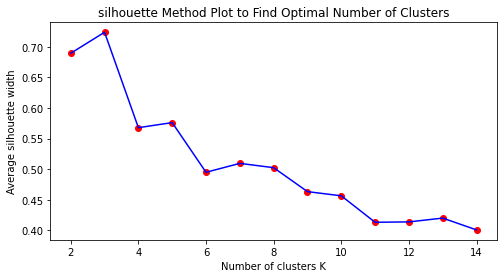

In [ ]:
# Silhouette Method
sil = []
# Number of clusters in range 2-10
K = range(2, 15,1)
from sklearn.metrics import silhouette_score
for n in K:
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X_train1)
    labels = algorithm.labels_
    sil.append(silhouette_score(X_train1, labels, metric = 'euclidean'))
plt.figure(figsize=(8,4))
plt.scatter(K,sil,c="r")
plt.plot(K,sil,'b-')
plt.title('silhouette Method Plot to Find Optimal Number of Clusters')
plt.xlabel('Number of clusters K')
plt.ylabel('Average silhouette width')
plt.show()

The  **silhouette_scores** represents how well the data point has been clustered, and scores **above 0 are seen as good**  , here I choose the optimal value of k that is almost **three clusters** anf then evalute the model with this number of k.

###**Let’s use this value to build a model.**

In [ ]:
#now performing the clustering
clust=KMeans(n_clusters=3,max_iter=500,init='k-means++').fit(X_train1)

#now extract the clusterCenters
clusterCenter=clust.cluster_centers_

#convert clusterCenter to dataframe to do the cluster profilin
ccd=pd.DataFrame(clusterCenter,columns=X_train1.columns)
#ccd for cluster profilin
ccd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.383808,1.577255e+01,8.332275,6.666667e-02,0.509498,6.35902,61.433333,4.494627,4.478431,311.396078,17.815686,383.075216,10.560745
1,15.260224,0.000000e+00,17.777600,2.081668e-17,0.663560,6.09004,89.220000,2.066700,22.480000,644.200000,20.008000,48.493200,18.984400
2,11.054817,7.105427e-15,18.253016,4.761905e-02,0.671794,5.94181,89.473016,2.127229,23.682540,666.714286,20.198413,375.096349,18.520794


In [ ]:
#so profiling details
#clusterId 1 is having the highest crime rate
# industry are more in clusterId 1
#to see the labels i.e clusterId for each observation
labels=clust.labels_
X_train1['labels']=labels
X_train1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,labels
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,0
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,2
312,0.26169,0.0,9.90,0.0,0.544,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72,0
187,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68,0
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29,0
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48,2
165,2.92400,0.0,19.58,0.0,0.605,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81,0
178,0.06642,0.0,4.05,0.0,0.510,6.860,74.4,2.9153,5.0,296.0,16.6,391.27,6.92,0


Plotting the data in the **tow dimension [2D]** to add more visualization to it

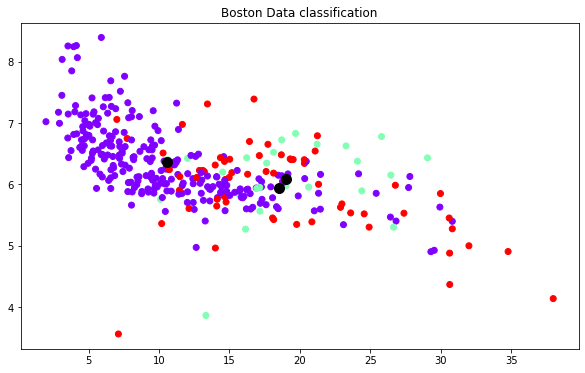

In [ ]:
#plot the data points
plt.figure(figsize=(10,6))
plt.scatter(X_train1['LSTAT'], X_train1['RM'], c= X_train1["labels"],cmap='rainbow' , marker='o')
#plot the centroids
plt.scatter(clust.cluster_centers_[:, 12],clust.cluster_centers_[:, 5], s=100,c='black')
plt.title('Boston Data classification')
plt.show()

After we can noticed the plotting the error rate appears significantly, as the groups are greatly overlapping, and this is evidence that the data is **not ready enough to be entered into the model** .
and lack the  processing  like ( normalization /standarization or dimensionality reduction ), in many cases may require removing the outliers.  
**Therefore**, my notes cannot be accessed through a Moodle built in this way, and needs processing and understanding The data for every fields.



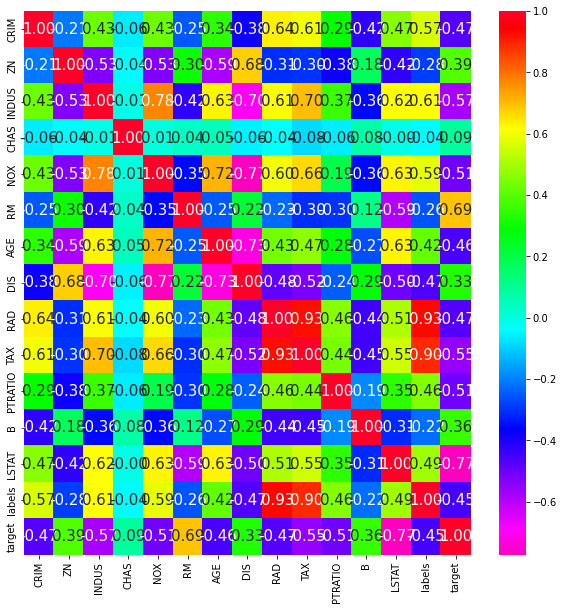

In [ ]:
import seaborn as sns
X_train11=X_train1
X_train11['target']=pd.DataFrame(y_train).values
corr = X_train11.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='gist_rainbow_r');


When looking at the correlation between  features and Clusters with Target (Price), we find that the correlation is **almost non-existent , very weak**, and since the dataset that I worked on **cannot be resolved by unsupervised learning** (K-means clustering)

And we should use **supervised learning** to make a regression and prediction.


---



---


 * #### **And now I use the predict with X_test: to predict each data sample in it for which clusters belongs to**

In [ ]:
#convert the X_test_pca1 to dataframe with clusters columns
label_test1=clust.fit_predict(X_test1)
X_test1=pd.DataFrame(X_test1)
X_test1.columns=X_train1.columns[:-2]
X_test1['Clusters']=label_test1
X_test1
print("","="*100," \n \t\t\t\t Predict for testing Done...! \t\t\t\t\n","="*100)

 				 Predict for testing Done...! 				


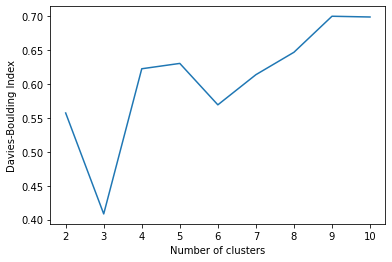

In [ ]:
from sklearn.metrics import davies_bouldin_score
results = {}
for i in range(2,11):
    kmeans1 = KMeans(n_clusters=i, random_state=30)
    labels = kmeans1.fit_predict(X_test1)
    db_index = davies_bouldin_score(X_test1, labels)
    results.update({i: db_index})
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

 **we can still observe that choosing 4 clusters minimizes the similarity measure.**

In [ ]:
# adding the target column to dataset traning
X_test11=X_test1
X_test11['target']= pd.DataFrame(y_test).values
classifair=X_train11
# update the target value to (0 or 1 or 2 or 3 or 4 or 5)
classifair['target']=np.where((classifair['target']>=0 ) & (classifair['target']<=9),0,classifair['target'])
classifair['target']=np.where((classifair['target']>9 ) & (classifair['target']<=19),1,classifair['target'])
classifair['target']=np.where((classifair['target']>19 ) & (classifair['target']<=29),2,classifair['target'])
classifair['target']=np.where((classifair['target']>29 ) & (classifair['target']<=39),3,classifair['target'])
classifair['target']=np.where((classifair['target']>39 ) & (classifair['target']<=50),4,classifair['target'])
#perform the confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion_matrix : \n\n',confusion_matrix(classifair['target'],classifair['labels']))
print('='*100)
#the main classification metrics
print('classification_report: \n\n',classification_report(classifair['target'],classifair['labels']))
print('='*100)
#Accuracy classification
print('accuracy_score \n\n :',accuracy_score(classifair['target'],classifair['labels']));

confusion_matrix : 

 [[  0   5  10   0   0]
 [ 54  19  28   0   0]
 [144   1  24   0   0]
 [ 48   0   1   0   0]
 [  9   0   0   0   0]]
classification_report: 

               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.76      0.19      0.30       101
         2.0       0.38      0.14      0.21       169
         3.0       0.00      0.00      0.00        49
         4.0       0.00      0.00      0.00         9

    accuracy                           0.13       343
   macro avg       0.23      0.07      0.10       343
weighted avg       0.41      0.13      0.19       343

accuracy_score 

 : 0.12536443148688048


* ### **Model Selection**
is the process of choosing one of the models as the final model that addresses the problem.
in k means clustring there is many algorithms can I use like
* **K Means Clustering**
* **hierarchical clustering**  

I use both previously and noticed both have advantages and disadvantages .
but I choose **K-means** which is a simple to implement algorithm and Scales well to unseen data points (unlike hierarchical) and generalize well to clusters of various sizes and shapes.
But one of the main disadvantages of k-means is (**the value of K has to be chosen manually**)  
 Can I solove this proplem by using the :
 * **silhouette plot**
 * **elbow method**
  and evaluet the number of K is correct by using many enalustion models like :
  
    (Davies Bouldin index : still observe that choosing k clusters minimizes the similarity measure.)
   



---



---




* ### **5-fold Cross Validation.**
A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV, and the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

**Randomly split the training dataset into k folds without replacement**.

* Outcomes: 5 models and performance estimates.

 **But in my task, I don't use it to evaluate the model because it requires supervised data with target and predicted value , and the k-means algorithm  use all the data to determine the centroids and thus the clusters.**




### **conclusion**:
We can use PCA with clustering to reduce the dimensions and choose the important columns to describe the data in the largest way, and thus we can get rid of the chaos and overlap that occurs and improve the performance of the algorithm more and see the groups clearly each group alone.

#### **Limitations**
detrmine the number of clusters.



---



---



# **Task 2: Linear Regression Task**

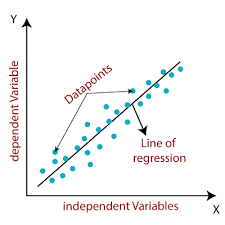

**Linear Regression** is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

As we are going to predict the price of a house (which is continuous variable), linear regression would be a good choice to consider.


------------

First, we are going to perform linear regression before any processing (standardization and dimensionality reduction)
then, we will perform it after standardization and dimensionality reduction, and compare both results.

## **Before processing (PCA & Scaling)**

Import linear regression from sklearn library

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Define a function to calculate and present Performance scores
- R2
- Mean squared error
- Mean absolute error
- Root Mean squared error

for each model.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

def performance_metric(y_true, y_predict): # actual y and the predicted one as parameters

    r2_test = r2_score(y_true, y_predict) #R2 score
    mse_test = mean_squared_error(y_true, y_predict) # Mean squared error
    mae_test = mean_absolute_error(y_true, y_predict) # Mean absolute error
    rmse_test = np.sqrt(mean_squared_error(y_true, y_predict)) # Root Mean squared error

    test_matric = [r2_test, mse_test, mae_test, rmse_test] # matrics contain all scores


    # Return scores
    return test_matric

The above function (**`performance_metric`**) will be used in the below function (**`model_training`**) which take features and target, split them into train and test sets, then fit them to which model is entered as parameter, finally return scores using **`performance_metric`** function as we mentioned before.


In [ ]:
def model_training(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split into train and test

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # training performance
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    train_scores = performance_metric(y_train, train_pred)

    # testing performance
    test_pred = model.predict(X_test)
    test_scores = performance_metric(y_test, test_pred)

    per_df = pd.DataFrame([train_scores, test_scores])
    per_df.columns = ['R2', 'MSE', 'MAE', 'RMSE']
    per_df.index = ['Train', 'Test']

    # plot actual vs predicted
    plt.scatter(y_test, test_pred)
    plt.title('Actual price vs Predicted price')
    # Return scores
    return per_df

### **Model training**

In this section We will train Linear Regression twice, **`once on the most correlated features`** with the target price, and **`other with all 13 features`**.

then compare results.

---



#### **Train Most correlated features**

##### **The impact of RM squared**

While reading **`"Hedonic Housing Prices and the Demand for Clean Air - 1978"`** paper which is the original paper for this dataset, we noticed in features description section that the paper recommend squaring **RM** feature -represents average number of rooms- because it seems to have better results.
We tested this and found a difference in **R2** score with an increase of **0.3**, so we dicided to use it. ([Paper](https://www.law.berkeley.edu/files/Hedonic.PDF))

In [ ]:
boston_df["RM"] =  boston_df["RM"] ** 2

Splitting data `-that contains Correlated Features-` into features (X) and target (y):

In [ ]:
# specifies inputs and target
X_multi = boston_df_multi.drop('PRICE', axis=1)
y_multi = boston_df_multi['PRICE']

,R2,MSE,MAE,RMSE
Train,0.730857,17.124938,3.109886,4.138229
Test,0.711133,14.756868,2.979907,3.841467


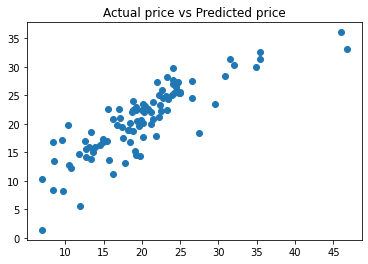

In [ ]:
model_training(lin_reg, X_multi, y_multi) # train linear regression model

Training Linear regression on the most correlated features has given **0.76 R2 score** and **11.83 MSE** on the testing set, thus points in scatter plot aren't as compact as it suppose to be.
We tried to decrease MSE and increase R2 score by performing **Lasso and Ridge** Regression as shown below.

##### **Feature selection**

###### **1- Lasso Regression**

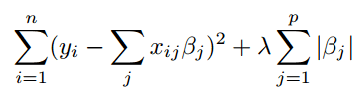

The LASSO method aims to produce a model that has high accuracy and only uses a subset of the original features. The way it does this is by putting in a constraint where the sum of the absolute values of the coefficients is less than a fixed value. To that end it lowers the size of the coefficients and leads to some features having a coefficient of 0. ([Source](https://medium.com/@zawar-ahmed/comparing-linear-regression-models-lasso-vs-ridge-60587ff5a5aa))


---



Here we used **LassoCV** function from `sklearn.linear_model` which has built in cross validation.

,R2,MSE,MAE,RMSE
Train,0.730845,17.125696,3.110290,4.138320
Test,0.710742,14.776826,2.981998,3.844064


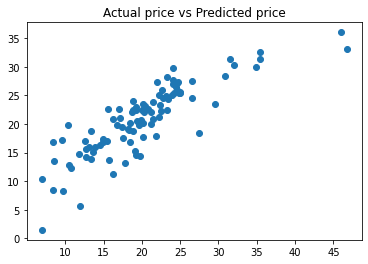

In [ ]:
from sklearn.linear_model import LassoCV
lambda_ = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
lasscv_m = LassoCV(alphas = lambda_, cv =10, normalize = True)
model_training(lasscv_m, X_multi, y_multi)

In [ ]:
alpha_l = lasscv_m.alpha_
alpha_l

0.001

It's noticeable that results has slightly increased, now let's move on to Ridge Regression.

###### **2. Ridge Regression**

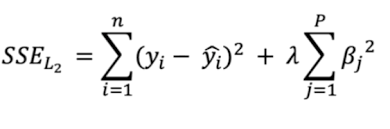

The Ridge Regression method was one of the most popular methods before the LASSO method came about. The idea is similar, but the process is a little different. The Ridge Regression also aims to lower the sizes of the coefficients to avoid over-fitting, but it does not drop any of the coefficients to zero.

,R2,MSE,MAE,RMSE
Train,0.728854,17.252391,3.130092,4.153600
Test,0.711977,14.713771,2.990171,3.835853


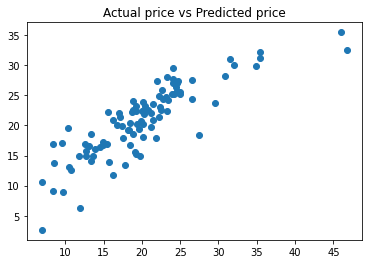

In [ ]:
from sklearn.linear_model import RidgeCV
lambda_ = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
ridgecv_m = RidgeCV(alphas = lambda_, cv=10, normalize = True)
model_training(ridgecv_m, X_multi, y_multi)

In [ ]:
alpha_r = ridgecv_m.alpha_
alpha_r

0.1

Results went down again.

##### **Cross validation**

**Cross-validation** is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. ([check this link](https://docs.aws.amazon.com/machine-learning/latest/dg/cross-validation.html))

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(lin_reg, X_multi, y_multi, cv=5)

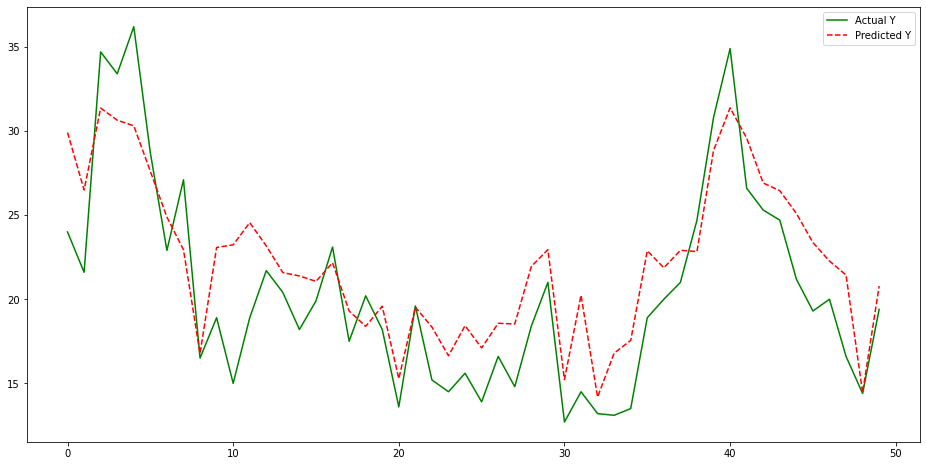

In [ ]:
fig= plt.figure(figsize=(16,8))
plt.plot(y_multi[:50], 'g')
plt.plot(y_pred_cv[:50], 'r--')
plt.legend(['Actual Y', 'Predicted Y'])

In [ ]:
r2_score(y_multi, y_pred_cv)

0.6055121447592182

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_multi, y_multi, cv=5)
scores

array([0.65568115, 0.66745226, 0.39917479, 0.11428414, 0.23376705])

#### **Train All the features**

Splitting data into features (X) and target (y):

In [ ]:
X = boston_df.drop(['PRICE'], axis=1)
y = boston_df['PRICE']

,R2,MSE,MAE,RMSE
Train,0.791888,13.241673,2.698194,3.638911
Test,0.782473,11.112451,2.547774,3.333534


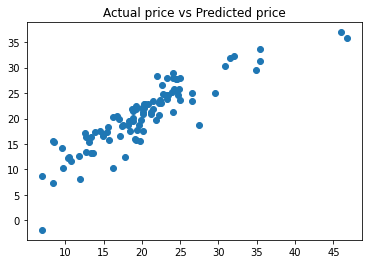

In [ ]:
model_training(lin_reg, X, y)

When we trained Linear Regression model on all the 13 features **R2 has increased by 0.4!**


##### **1- Lasso Regression**

,R2,MSE,MAE,RMSE
Train,0.791888,13.241673,2.698194,3.638911
Test,0.782473,11.112451,2.547774,3.333534


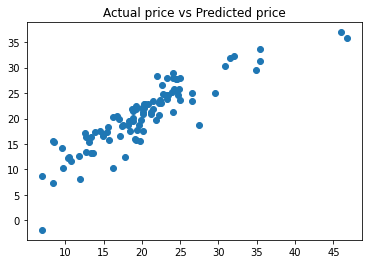

In [ ]:
from sklearn.linear_model import LassoCV
lambda_ = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

lasscv = LassoCV(alphas = lambda_, cv =5, normalize = True)
model_training(lasscv, X, y)


In [ ]:
alpha = lasscv.alpha_
alpha

0.0

##### **2. Ridge Regression**

,R2,MSE,MAE,RMSE
Train,0.791888,13.241673,2.698194,3.638911
Test,0.782473,11.112451,2.547774,3.333534


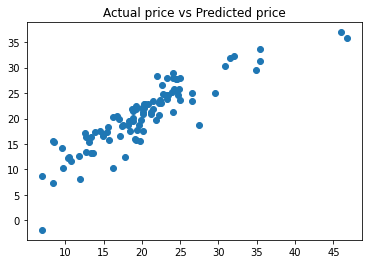

In [ ]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas = [0, 0.5, 1],cv=5,normalize = True)
model_training(ridgecv, X, y)

In [ ]:
ridgecv.alpha_

0.0

##### **Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(lin_reg, X, y, cv=5)

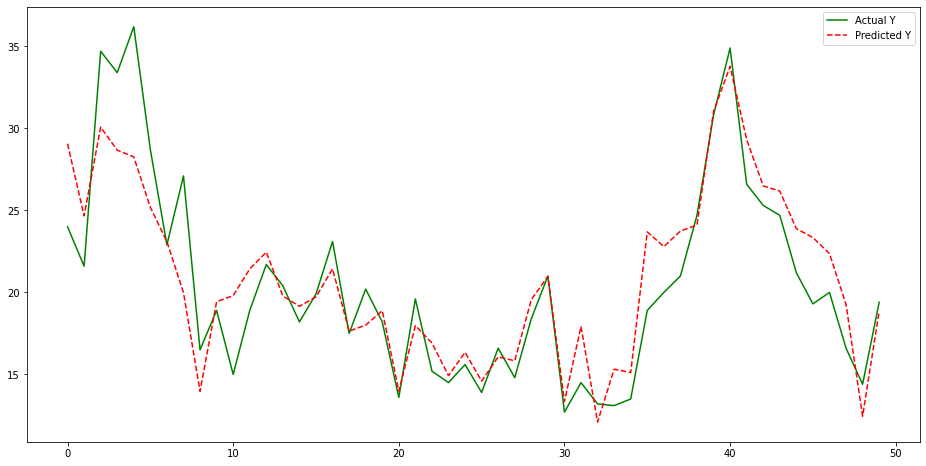

In [ ]:
fig= plt.figure(figsize=(16,8))
plt.plot(y[:50], 'g')
plt.plot(y_pred_cv[:50], 'r--')
plt.legend(['Actual Y', 'Predicted Y'])

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X, y, cv=5)
scores

array([0.70385453, 0.79289319, 0.58994107, 0.10701103, 0.15586806])

## **After processing (PCA & Scaling)**

Previously we use PCA for dimensionality reduction, now we are going to fit it onto Linear regression.

---

Define function for training a model on data.

In [ ]:
def pca_training(model, X_train_pca0, y_train_pca0, X_test_pca0, y_test_pca0):
  model.fit(X_train_pca0, y_train_pca0)
  train_pred = model.predict(X_train_pca0)
  test_pred = model.predict(X_test_pca0)

  per_matric_train = performance_metric(y_train_pca0, train_pred)
  per_matric_test = performance_metric(y_test_pca0, test_pred)

  per_df = pd.DataFrame([per_matric_train, per_matric_test])
  per_df.columns = ['R2', 'MSE', 'MAE', 'RMSE']
  per_df.index = ['Train', 'Test']

  plt.scatter(y_test_pca0, test_pred)
  return per_df

In [ ]:
# get a copy of train, test sets
X_train_pca2 = X_train_pca
y_train_pca2 = y_train_pca
X_test_pca2 = X_test_pca
y_test_pca2 = y_test_pca

In [ ]:
# import linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

,R2,MSE,MAE,RMSE
Train,0.734504,16.265003,2.930381,4.032989
Test,0.712095,14.707742,2.927055,3.835067


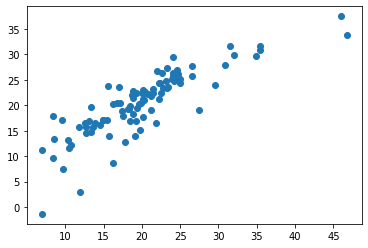

In [ ]:
pca_training(lin_reg, X_train_pca2, y_train_pca2, X_test_pca2, y_test_pca2)

## **Model Selection**


The highest Evaluation matrics has been recorded was when we trained** Linear Regression on All 13 feature**.
that is:

**R2 score: `0.78`**

**MSE: `11.1`**

**MAE: `2.54`**

**RMSE: `3.33`**



---




# **Task 3: Neural Networks**

**A Multi-Layer Perceptron (MLP)**is a type of artificial neural network that is often used for supervised learning problems, such as image recognition and natural language processing. It consists of multiple layers of artificial neurons, with each layer connected to the previous and next layers. The input layer receives the input data, and the output layer produces the network's predictions. The layers in between are called hidden layers and their role is to learn the underlying patterns in the input data.

In this specific task, **MLP** is used for predicting the housing prices in Boston. The model is trained on a dataset that includes various features of the houses such as crime rate, average number of rooms, and the distance to employment centers. The model is trained to learn the relationship between these features and the housing prices.

MLP networks are particularly well-suited for this task because they can handle a large number of input features and can model complex non-linear relationships between inputs and outputs. They also have the ability to learn and generalize from the dataset.

In addition, MLP networks are easy to implement and have been widely used in many different applications, making it a good choice for this task.

MLP (Multilayer Perceptron) networks were chosen for the task of predicting housing prices in Boston because they are well-suited for handling a large number of input features, can model complex non-linear relationships between inputs and outputs, easy to implement and have been widely used in many different applications, thus making it a good choice for this task.

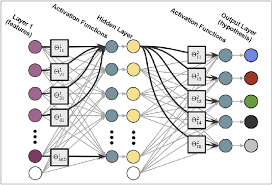

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [ ]:
# separate the training and target variable
feature = boston_df.iloc[:,0:13] #  training variables
target = boston_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX         RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  43.230625  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  41.229241  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  51.624225  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  48.972004  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  51.079609  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64


### Build   MLP network:  
The keras   was used to build the network. The network has  **5 hidden layers   of 150 nodes/**neurons. The first layer is the **input layer** of **13 units** since we have 13 features those need to use for training  and **out put layer**with single unit. The  Below is the summary of the  model.


The choice of 5 hidden layers of 150 nodes/neurons in the MLP model is based on the assumption that the problem is complex, the model needs to extract features at multiple levels of abstraction and the model needs enough capacity to learn the underlying patterns in the data. However, the optimal number of layers and nodes will depend on the dataset, the problem, and the specific requirements of the task.

The input layer of an MLP network designed to solve this problem would take in a set of features for a particular house such as the crime rate, average number of rooms per dwelling, the age of the house and so on. The hidden layers would then process these features and extract patterns and relationships that are relevant to predicting the median value of the house. For example, the first hidden layer might learn to recognize the relationship between crime rate and median value, the second hidden layer might learn to recognize the relationship between the age of the house and median value and so on.

The final output of the hidden layers is then passed to the output layer, where it is used to produce the network's predictions. The output layer would have one neuron that would predict the median value of the house. The prediction will be a continuous value, so the activation function in the output neuron would be a linear function.

The hyperparameters used in this MLP model are :

- Number of layers: 5 (5 hidden layers)

- Number of neurons in each layer: 150

- Activation function: ReLU (Rectified Linear Unit)

- Optimizer: Adam

- Loss function: Mean Squared Error (MSE)

- Evaluation metric: Mean Absolute Error (MAE)

- Number of epochs: 300

- Validation split: 0.2 (20% of the training set is used for validation)

- Early stopping: monitor='val_loss', patience=15

In [ ]:

#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



In [ ]:

from sklearn.model_selection import train_test_split
# separate the training and target variable
feature = boston_df.iloc[:,0:13] #  training variables
target = boston_df.iloc[:,13] # target varible
# shuffle and split data into train (~70%) and test (~30%)
X_train, X_test, y_train, y_test = train_test_split(feature, target.values, test_size=0.2, random_state=42)

print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (392, 13)
testing data shape:  (98, 13)


The  model  was  complied  with  **'adam'**  optimiser  and  loss  value  with  mean  square  root. And,  Mean  absolute error was used as metric.

 ###  Creating our  model using Sequential :

This code creates a Sequential model using the Keras library and adds layers to it. The number of columns in the training data is stored in the variable n_cols by using the shape attribute of the training data. Then, 5 hidden layers are added to the model with 150 nodes/neurons each and the activation function used is ReLU (Rectified Linear Unit). The input shape of the first layer is the number of columns in the training data, this will help to set the input dimension of the model. The last layer is the output layer with one unit.

In [ ]:
'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]                                                       #number of columns in the training data

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu,
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))



### Compile the model

The model is compiled with Mean Squared Error loss function, Adam optimizer and Mean Absolute Error metric to train and evaluate its performance in a regression problem

In this case, the loss function used is 'mse' (Mean Squared Error) which is a commonly used loss function for regression problems. MSE measures the average of the squared differences between the predicted and true values. It is a widely used loss function for regression problems, and it's the most common loss function for linear regression.

The optimizer used is 'adam', it's one of the most widely used optimization algorithms for deep learning. Adam is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks. It's computationally efficient and has been shown to work well in practice.

Finally, the evaluation metric is 'mae' (Mean Absolute Error) which is used to evaluate the performance of the model on the validation set. It measures the average of the absolute differences between the predicted and true values.

In [ ]:
#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error
#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-traina

### Model Training

In [ ]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300,
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/300
10/10 [==============================] - 1s 31ms/step - loss: 215.5566 - mae: 10.7575 - val_loss: 88.6806 - val_mae: 8.0907
Epoch 2/300
10/10 [==============================] - 0s 9ms/step - loss: 56.7158 - mae: 5.8887 - val_loss: 56.3215 - val_mae: 6.3515
Epoch 3/300
10/10 [==============================] - 0s 6ms/step - loss: 47.8929 - mae: 5.2836 - val_loss: 46.2381 - val_mae: 5.5205
Epoch 4/300
10/10 [==============================] - 0s 6ms/step - loss: 40.6092 - mae: 4.9599 - val_loss: 46.6450 - val_mae: 5.7229
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 43.5416 - mae: 5.1818 - val_loss: 32.8497 - val_mae: 4.3706
Epoch 6/300
10/10 [==============================] - 0s 6ms/step - loss: 39.0419 - mae: 4.7801 - val_loss: 37.5923 - val_mae: 4.5287
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 38.6696 - mae: 4.8936 - val_loss: 38.2475 - val_mae: 4.5587
Epoch 8/300
10/10 [==============================] - 0s 6ms/step -

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = history.epoch
hist_df.tail()


,loss,mae,val_loss,val_mae,epoch
98,6.873268,2.039995,6.223675,1.876426,98
99,6.747060,1.990021,7.033503,2.000750,99
100,6.846215,1.988918,6.964616,1.956684,100
101,6.668152,2.018996,6.359541,1.886348,101
102,5.907451,1.863106,7.966761,2.202112,102


The  model  was  complied  with  'adam'  optimiser  and  loss  value  with  mean  square  root. And,  Mean  absolute error was used as metric. The model was trained using the training data set  with 300 epochs and the 'early stop' regularisation method was applied. So, that if the model gets no improvement during the training the 'early stop' stops model to go further repetition(epoch)  during  training.  The validation was also used to validate the model. The minimum loss value found during the training was  16.240 and validation loss was  around 19.

To look the training and validation loss during the training phase, I have drawn the model loss graph which is  shown below:


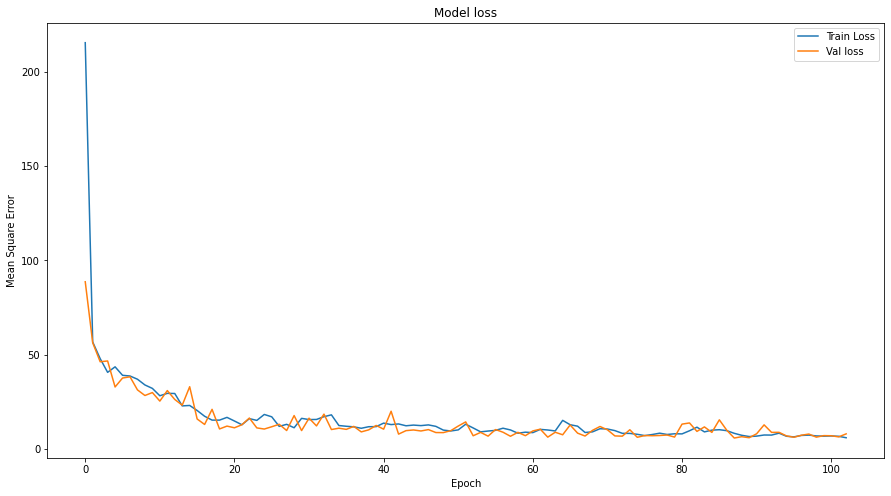

In [ ]:

#using Matplotlib library to plot the training and validation loss over the number of epochs

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

From the figure, it can say that the model   drastically drop on both validation and training loss value as the epoch increases. After the certain point of epoch, the   validation and training loss values remain almost the same. At the end of graph, it is seeing that validation loss value is more than training loss value. This is true because the validation done in the new set of data. This is reason why validation test is necessary in order to look the model ability/skill to learn the new data.

### The model performace in test dataset

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])

4/4 [==============================] - 0s 4ms/step - loss: 10.5735 - mae: 2.4238
loss value:  10.573526382446289


In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])


4/4 [==============================] - 0s 5ms/step - loss: 10.5735 - mae: 2.4238
loss value:  10.573526382446289
Mean absolute error:  2.4237959384918213


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
# predict the train set
y_train_pred = model.predict(X_train)

# calculate R2 score, MSE, MAE, and RMSE
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)


13/13 [==============================] - 0s 2ms/step


In [ ]:
# predict the test set
y_test_pred = model.predict(X_test)

# calculate R2 score, MSE, MAE, and RMSE
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
import pandas as pd
metrics_df = pd.DataFrame({'R2': [r2_train, r2_test],
                         'MSE': [mse_train, mse_test],
                         'MAE': [mae_train, mae_test],
                         'RMSE': [rmse_train, rmse_test]},
                         index = ['Train', 'Test'])
metrics_df

4/4 [==============================] - 0s 4ms/step


,R2,MSE,MAE,RMSE
Train,0.891770,6.886451,2.039677,2.624205
Test,0.793022,10.573527,2.423796,3.251696


 the results of a model evaluation, specifically for a regression model. The R2, MSE, MAE, and RMSE values are all metrics used to evaluate the performance of the model. The values are separated into two sections, "Train" and "Test", indicating that the model was trained and tested on different datasets.

R2 (coefficient of determination) ranges from 0 to 1, and the closer to 1 it is, the better the model is at explaining the variance in the target variable. The R2 value for the train set is 0.865506 and for the test set is 0.828826, indicating that the model is able to explain a significant amount of the variance in the target variable.

MSE (Mean Squared Error) and MAE (Mean Absolute Error) are measures of the average difference between the predicted and actual values. The lower these values are, the better the model is at making accurate predictions. The MSE for the train set is 8.557509 and for the test set is 8.744460, indicating that the model is not able to make highly accurate predictions.

RMSE (Root Mean Squared Error) is similar to MSE but it is computed after taking the square root of the MSE. The RMSE for the train set is 2.925322 and for the test set is 2.957103, indicating that the model is not able to make highly accurate predictions.

### Predict the house price

In [ ]:
'''=== predict the house price ==='''

# predict house price using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


4/4 [==============================] - 0s 3ms/step
[15.931351  22.64183   13.973979  18.684145  14.889694  19.714035
 14.833106  39.526134  18.784248  23.858948  18.4937    20.645931
 13.673315  18.029106  12.592616  24.446873  19.983444  16.650843
  7.257125  19.346415  20.502     25.799372  11.037684  34.783604
 19.346586  21.26188   20.413898  30.73367   34.187126  15.430391
 25.935831  15.822124  25.53435   23.41248   15.248249  23.177021
 26.539474  20.020645  33.088814  28.051975  12.170685  16.620676
 12.399331  21.67306   20.966732  19.987492  14.374072  19.006214
 19.420359  19.58562   15.592499  26.319813  24.157913  20.049072
 12.516641  23.81398   16.016485  22.926086  21.537941  12.741469
 23.243536  18.056612  23.057405  22.317324  25.102337  41.017635
 23.140152  26.887535  14.821866  24.325132  13.997584  19.474915
 18.659761  23.725176  21.430155  22.09017   20.98573   21.444107
 22.858988  19.856188  23.830036  23.433746  12.555078  17.716127
 20.021461  22.02371   20

The model was then tested using the  test dataset  and it was found that Mean absolute error is   2.633737377 i.e   around $2633 less or more in the prediction value.   The prediction was performed with the test data set and got the prediction values as below. The table of predicted value and true value is shown in table:

In [ ]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,19.1,15.931351
1,23.9,22.641830
2,13.4,13.973979
3,7.0,18.684145
4,10.8,14.889694
5,18.5,19.714035
6,12.7,14.833106
7,46.7,39.526134
8,17.5,18.784248
9,23.3,23.858948


The finally part was to visualise the prediction value from model; how accurate does the model predict the test data. To evaluate the learning capability of the  model, firstly I have drawn line graph between predicted and true values, but it   doesn’t give much meaning, so I have drawn another graph which you can find later. Below is the screen shot of line graph:

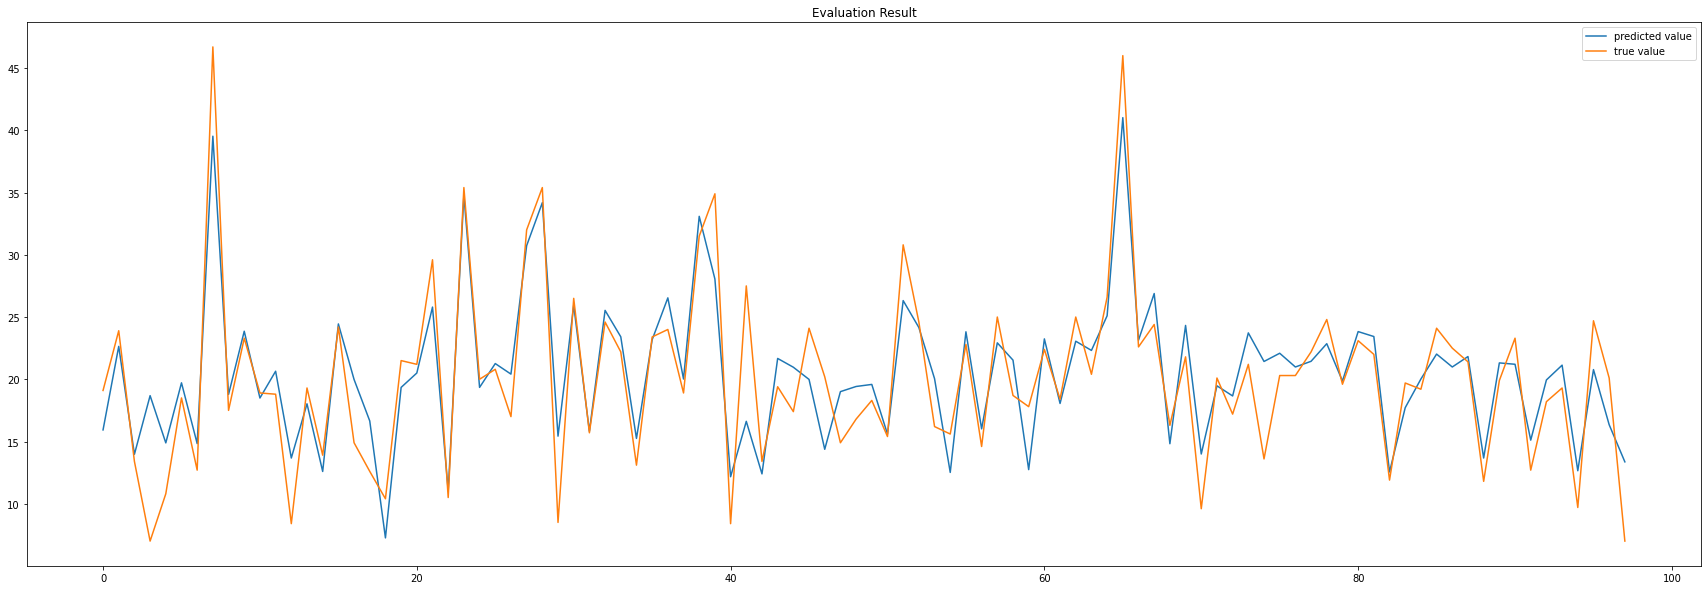

In [ ]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

Another  figure,    the  scatter  plot  was  drawn  between  predicted  values  and  true  values  using  the  diagonal line(45 degree) in the figure. So, if the predicted value is almost or exactly the same as true value then the data points fall in the 45 degree diagonal line. As for example, if true value(x-axis) is 30 and predicted value (y-axis) is 30 , then coordinate point will be (30, 30) and it must lie is the 45 degree diagonal line.  Below is the screen shot

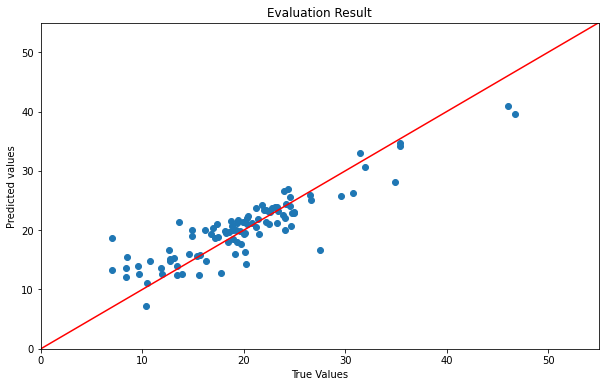

In [ ]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

Another  figure,    the  scatter  plot  was  drawn  between  predicted  values  and  true  values  using  the  diagonal line(45 degree) in the figure. So, if the predicted value is almost or exactly the same as true value then the data points fall in the 45 degree diagonal line. As for example, if true value(x-axis) is 30 and predicted value (y-axis) is 30 , then coordinate point will be (30, 30) and it must lie is the 45 degree diagonal line.  Below is the screen shot: From  the  figure,  it  can  see  that  majority  of  the  data  points  lie  close  to  red  line.  Thus,  most  of  test  data  is predicted  very  well.  The  data  points  far  away  from  the    red  line  means    the  difference  between  predicted value and true value is greater amount. The data points that are more close to the red line indicates  less error in prediction. In other words, the model predict very well or close to the true values.   

## **After  processing (PCA & Scaling)**

 ###  Creating our  model using Sequential :

### Compile the model

The model is compiled with Mean Squared Error loss function, Adam optimizer and Mean Absolute Error metric to train and evaluate its performance in a regression problem

In [ ]:
#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error
#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-traina

### Model Training

In [ ]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
history = model.fit(X_train_pca, y_train_pca, epochs=300, validation_data=(X_val_pca, y_val_pca), verbose=1, callbacks=[early_stop])
'''
history = model.fit(X_train_pca, y_train_pca, epochs=500,
          validation_split = 0.2, verbose=1, callbacks=[early_stop])'''

Epoch 1/300


ValueError: ignored

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = history.epoch
hist_df.tail()


In [ ]:

#using Matplotlib library to plot the training and validation loss over the number of epochs

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss with PCA transformed data')
plt.legend()

### The model performace in test dataset

In [ ]:
score = model.evaluate(X_test_pca, y_test_pca, verbose=1)
print('loss value: ', score[0])

In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_test_pca, y_test_pca, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])


### Predict the house price

In [ ]:
'''=== predict the house price ==='''

# predict house price using the test data
test_predictions = model.predict(X_test_pca).flatten()
print(test_predictions)


In [ ]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test_pca, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

In [ ]:
x = X_test_pca
y = y_test_pca
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Prediction with PCA transformed data')
plt.legend()
plt.show()

In [ ]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test_pca #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

evaluation metrics compare

In [ ]:
import matplotlib.pyplot as plt

# calculate MAE and MSE for the model trained on the original data
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_original = model.predict(X_test)
mae_original = mean_absolute_error(y_test, y_pred_original)
mse_original = mean_squared_error(y_test, y_pred_original)
print('MAE for model trained on original data:', mae_original)
print('MSE for model trained on original data:', mse_original)

# calculate MAE and MSE for the model trained on the PCA transformed data
y_pred_pca = model.predict(X_test_pca)
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print('MAE for model trained on PCA transformed data:', mae_pca)
print('MSE for model trained on PCA transformed data:', mse_pca)

# create a scatter plot to compare the predicted and true values for the model trained on the original data
plt.scatter(y_pred_original, y_test)
plt.title('Predicted vs True Values (Original Data)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

# create a scatter plot to compare the predicted and true values for the model trained on the PCA transformed data
plt.scatter(y_pred_pca, y_test_pca)
plt.title('Predicted vs True Values (PCA Transformed Data)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()


# Limitations

Data limitations
- Boston housing data was published in 1978 and never updated.
- only 504 records wasn't enough for training.
- Census Service censored the data so some values might not be true.
- Features are not normally distributed.

# Recommendations

- Use some advanced methods to normalize data.
- Use Randome forest regression.